# V5_compare all models

In [4]:
import pickle
import glob

In [172]:
all_models = [g.split('data/')[-1].split('_itr')[0] for g in glob.glob('data/*_itr0_trial1.pickle')]

In [40]:
for mod in all_models:
    for t in range(1,6):
        print('data/{}_itr39_trial{}.pickle'.format(mod,str(t)))

data/random_itr39_trial1.pickle
data/random_itr39_trial2.pickle
data/random_itr39_trial3.pickle
data/random_itr39_trial4.pickle
data/random_itr39_trial5.pickle
data/equally_x_itr39_trial1.pickle
data/equally_x_itr39_trial2.pickle
data/equally_x_itr39_trial3.pickle
data/equally_x_itr39_trial4.pickle
data/equally_x_itr39_trial5.pickle
data/ensemble_of_3_boot_itr39_trial1.pickle
data/ensemble_of_3_boot_itr39_trial2.pickle
data/ensemble_of_3_boot_itr39_trial3.pickle
data/ensemble_of_3_boot_itr39_trial4.pickle
data/ensemble_of_3_boot_itr39_trial5.pickle
data/discrim_model_normal_itr39_trial1.pickle
data/discrim_model_normal_itr39_trial2.pickle
data/discrim_model_normal_itr39_trial3.pickle
data/discrim_model_normal_itr39_trial4.pickle
data/discrim_model_normal_itr39_trial5.pickle
data/qrnn_of_3_itr39_trial1.pickle
data/qrnn_of_3_itr39_trial2.pickle
data/qrnn_of_3_itr39_trial3.pickle
data/qrnn_of_3_itr39_trial4.pickle
data/qrnn_of_3_itr39_trial5.pickle
data/equally_xy_itr39_trial1.pickle
data

In [43]:
eval_dict = {}
for m in all_models:
    one = []
    for i in range(1,6):
        with open('data/{}_itr39_trial{}.pickle'.format(m,i), mode='rb') as f:
            d = pickle.load(f)
        one.append([dd.cpu().numpy() for dd in d['eval']])
        eval_dict[m] = np.array(one)

In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [59]:
import pickle

In [60]:
with open('summary39.pickle',mode='wb') as f:
    pickle.dump(eval_dict,f)

# draw each graph

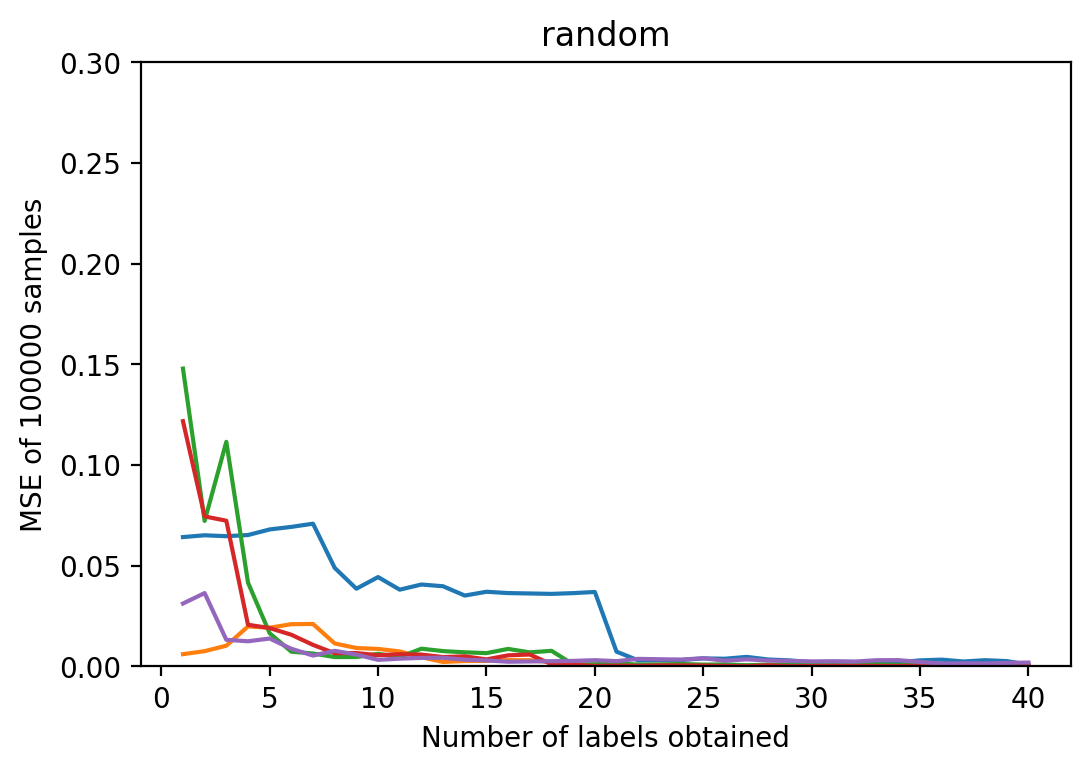

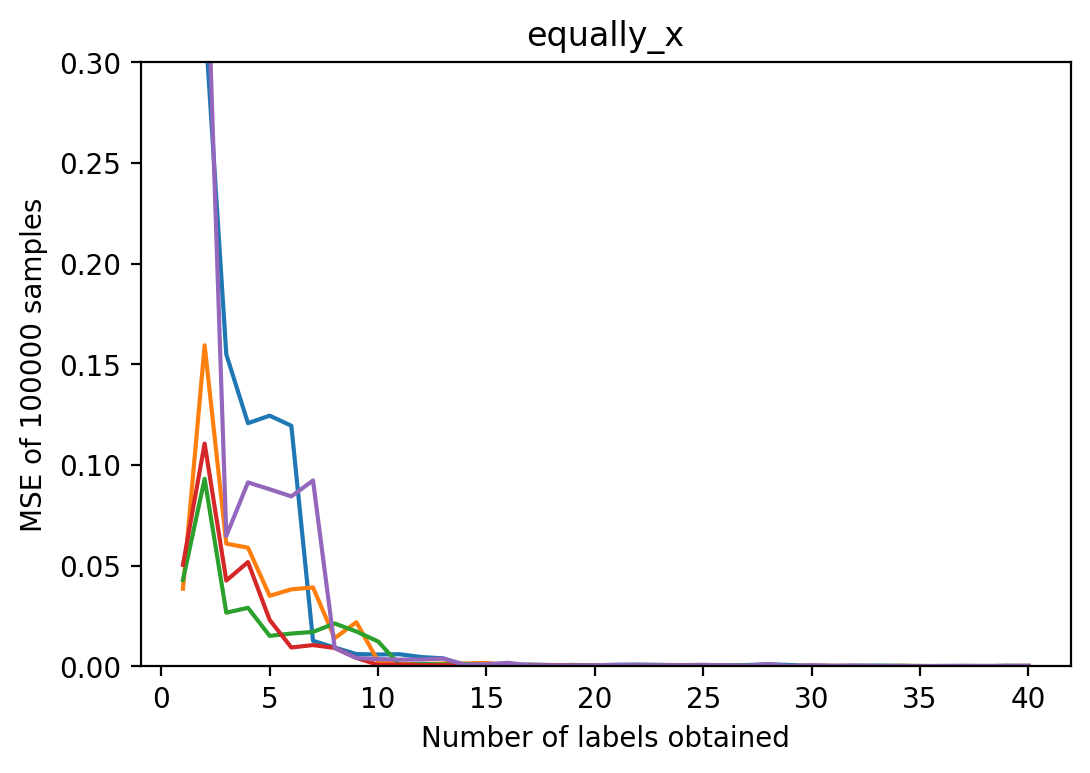

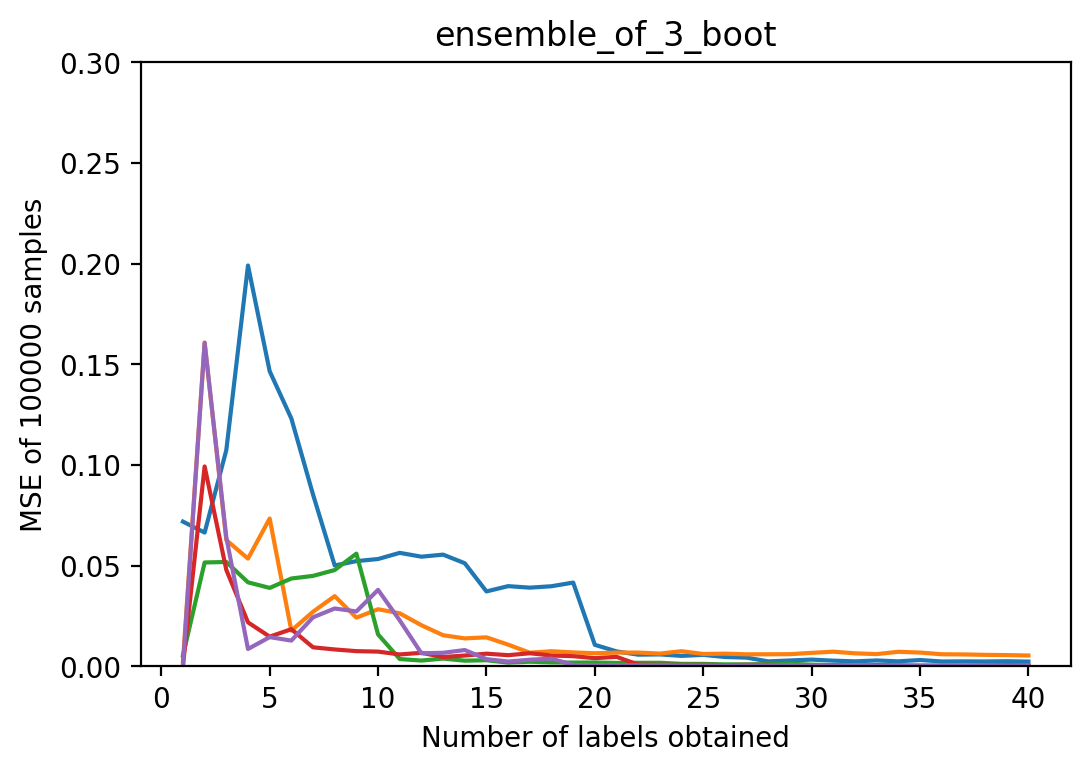

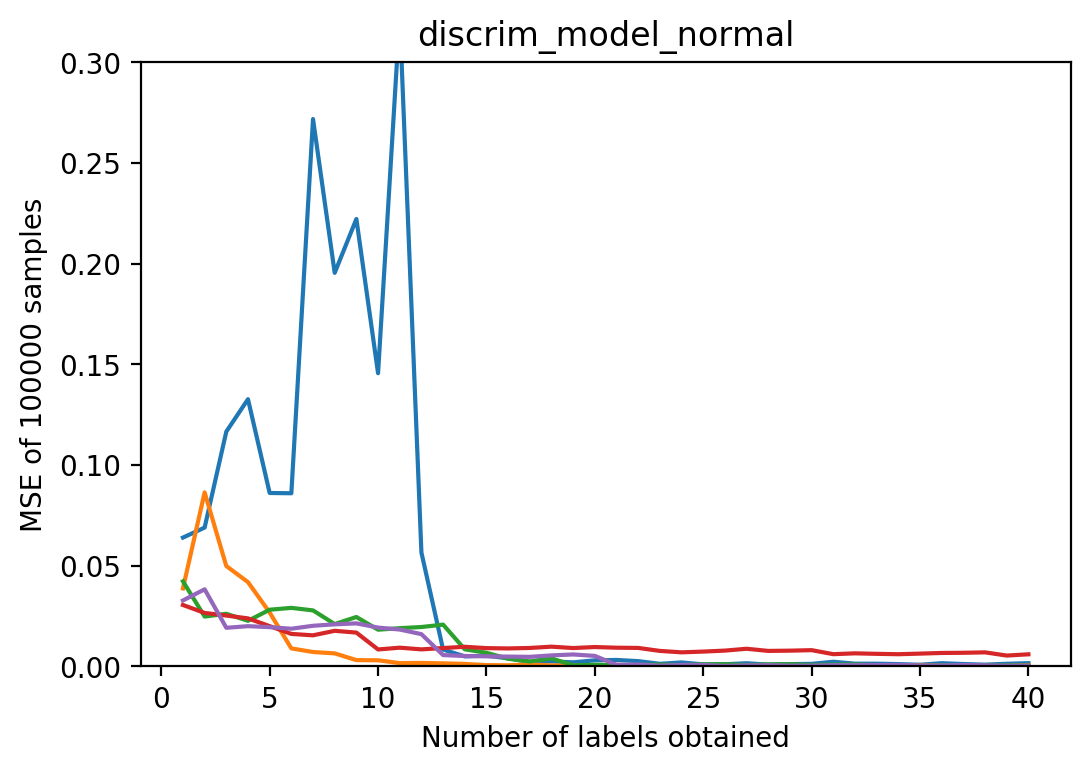

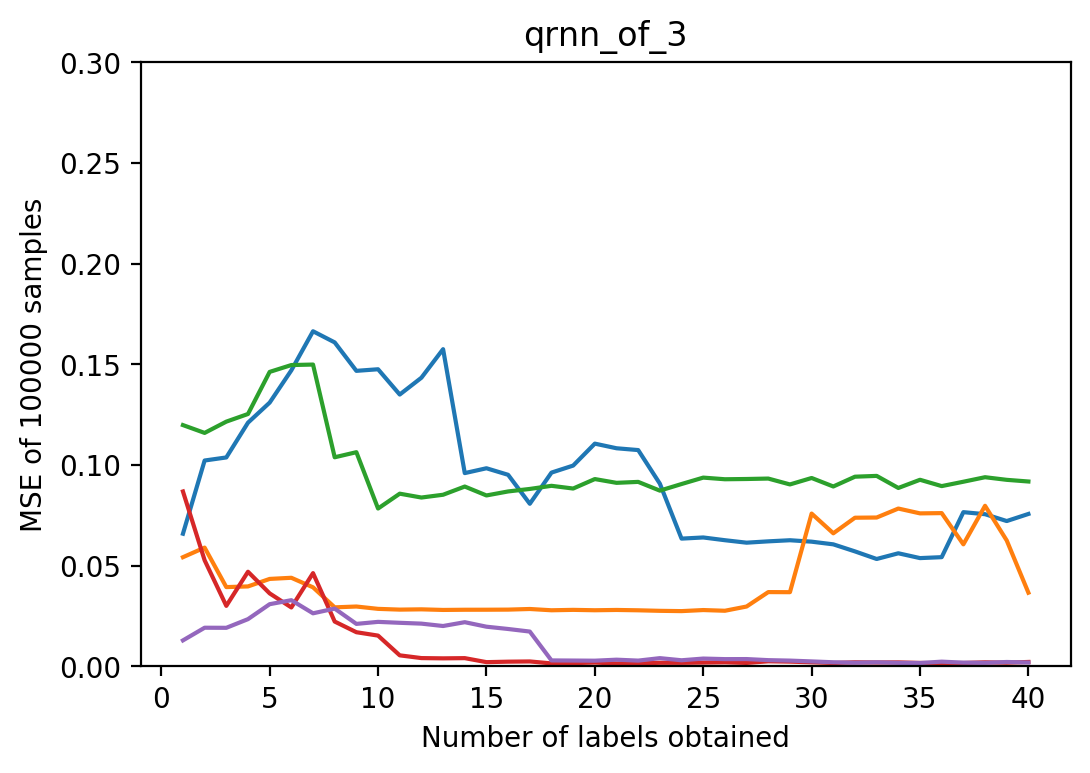

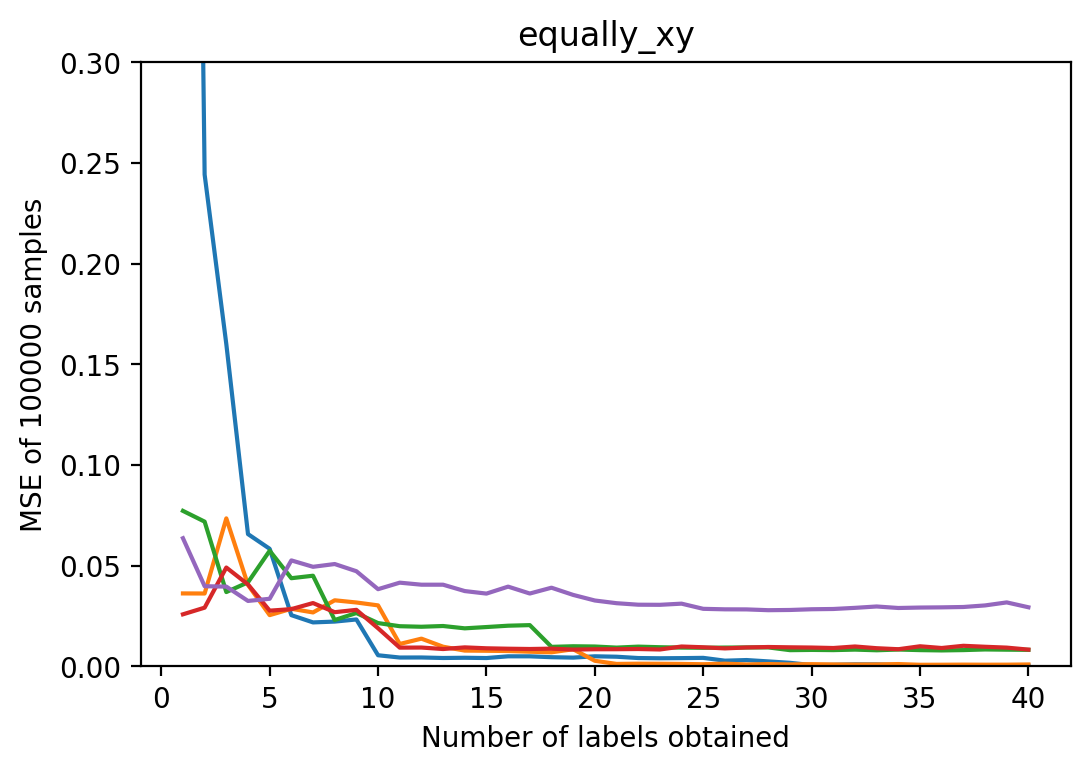

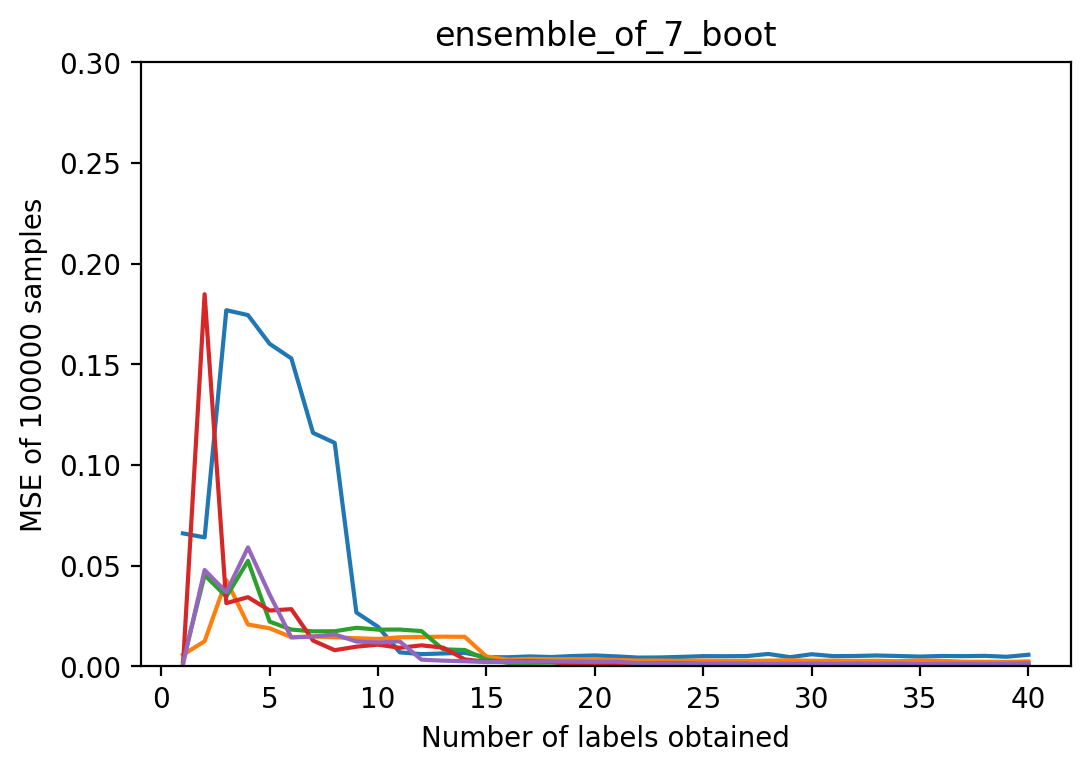

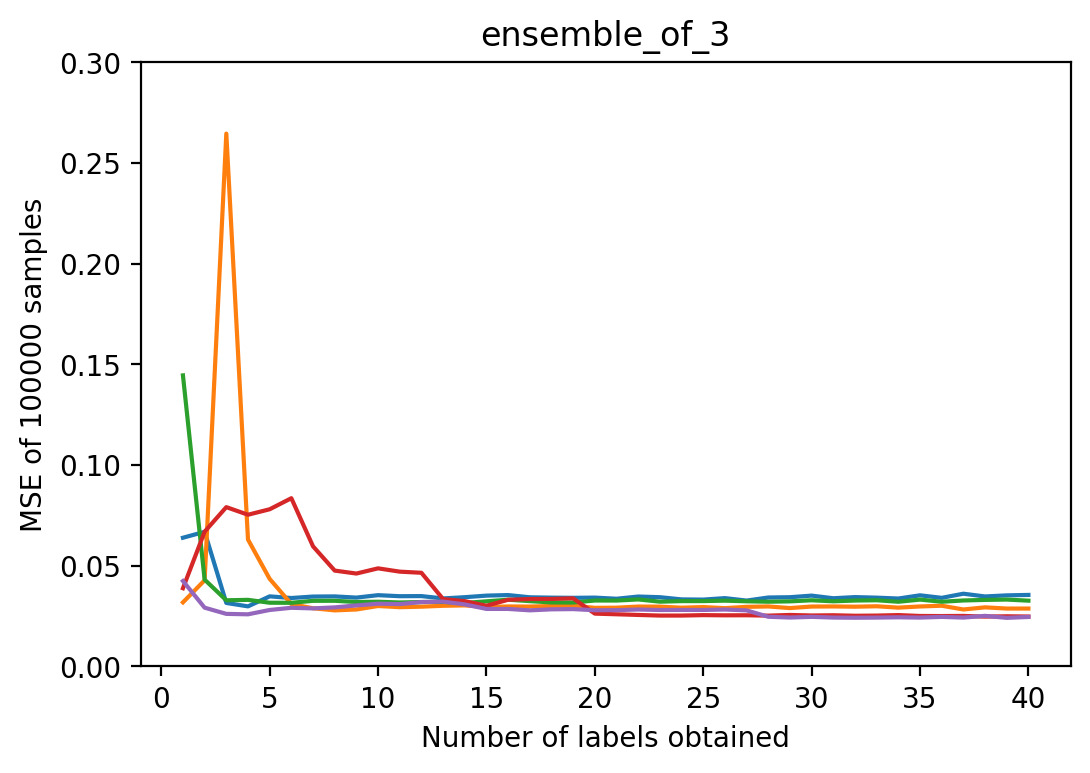

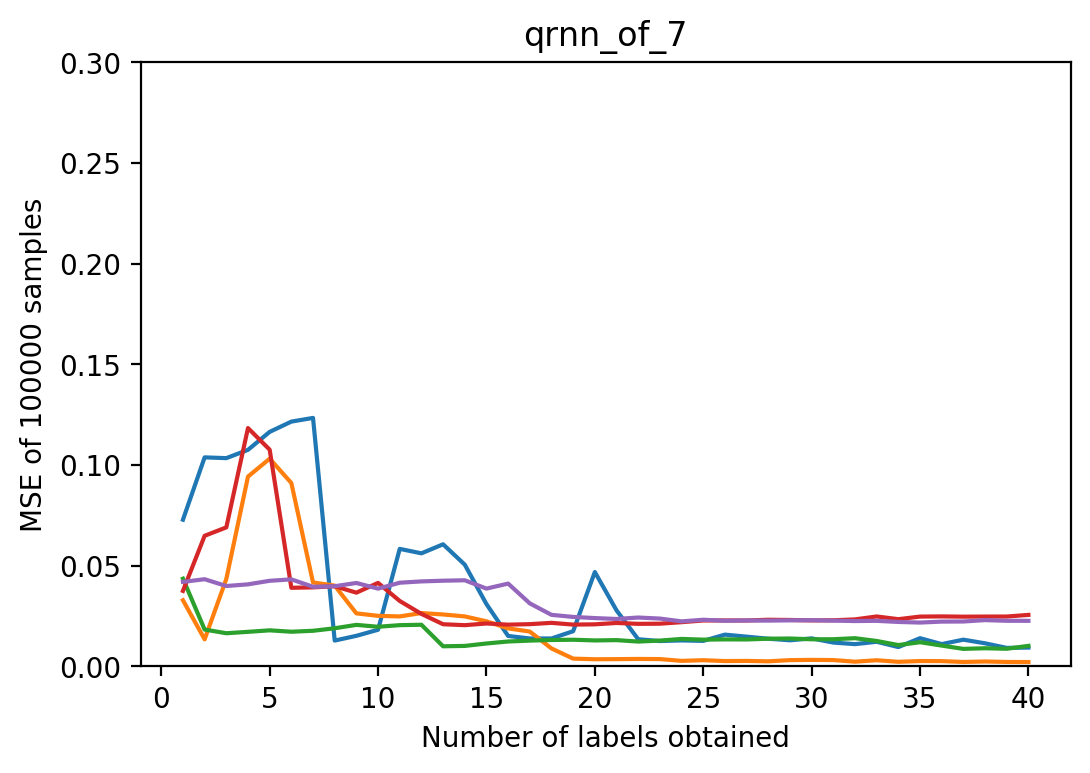

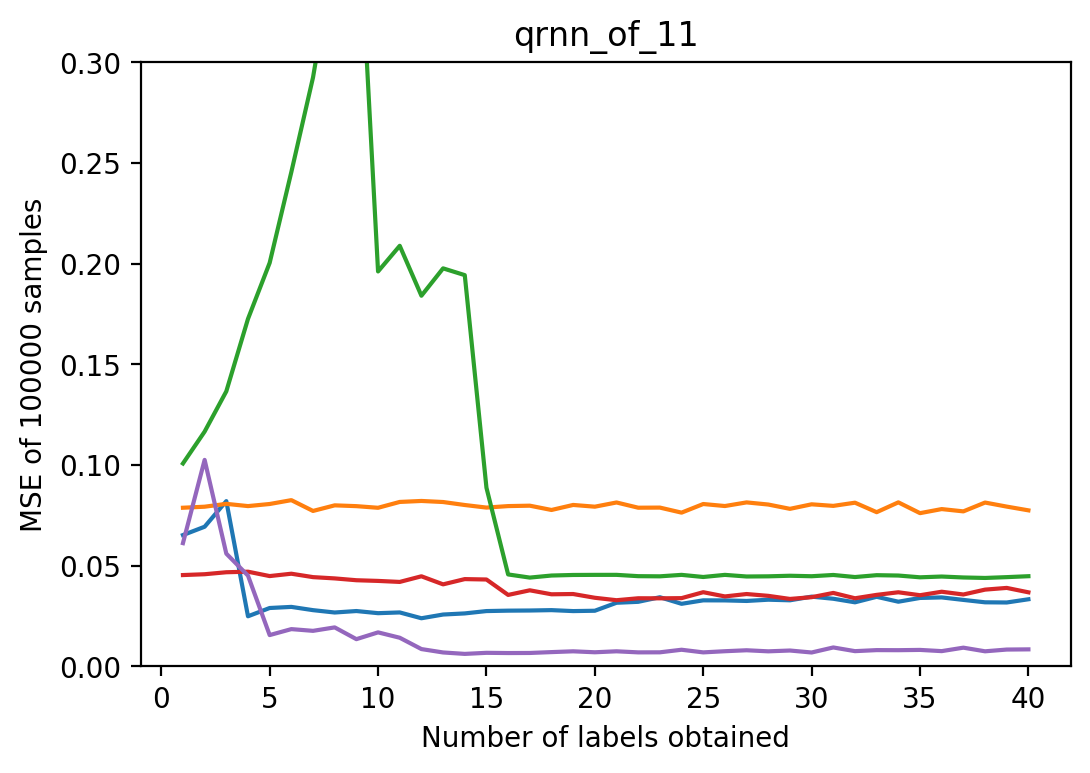

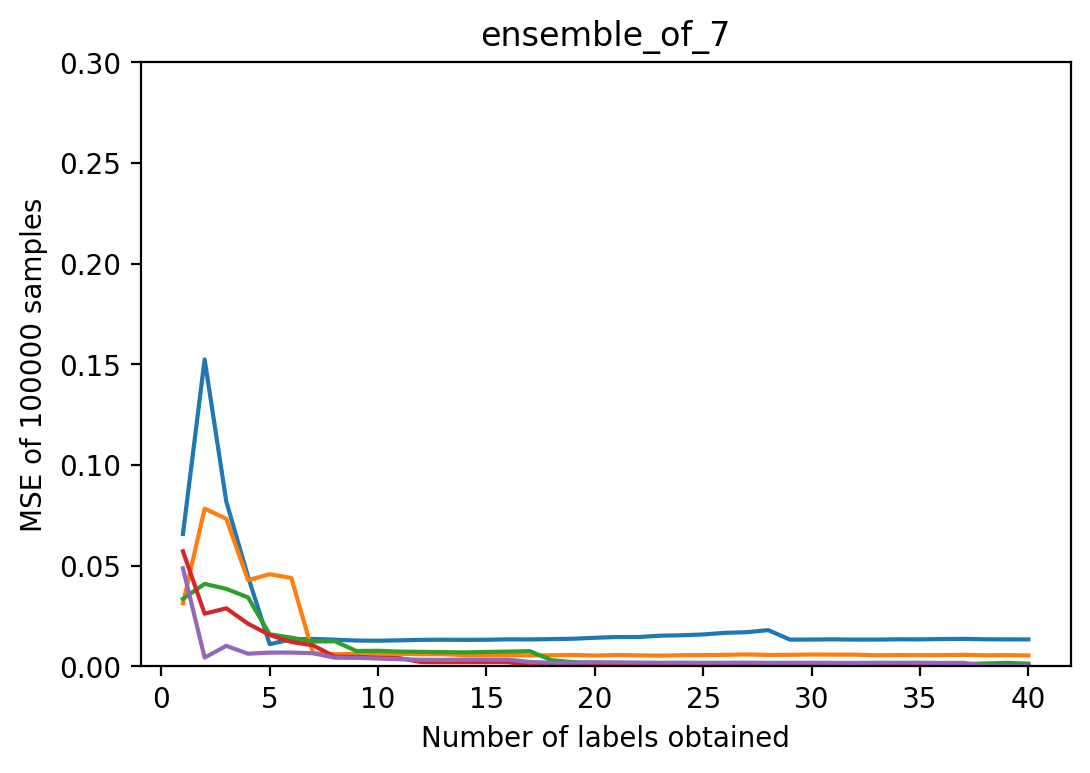

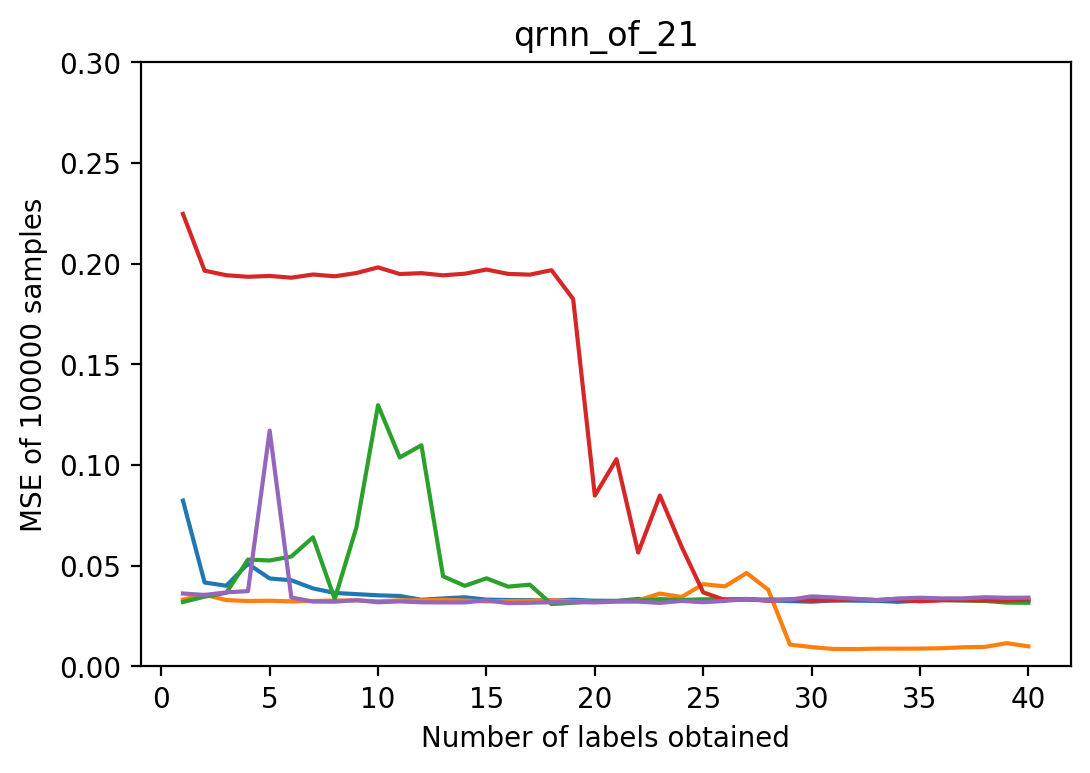

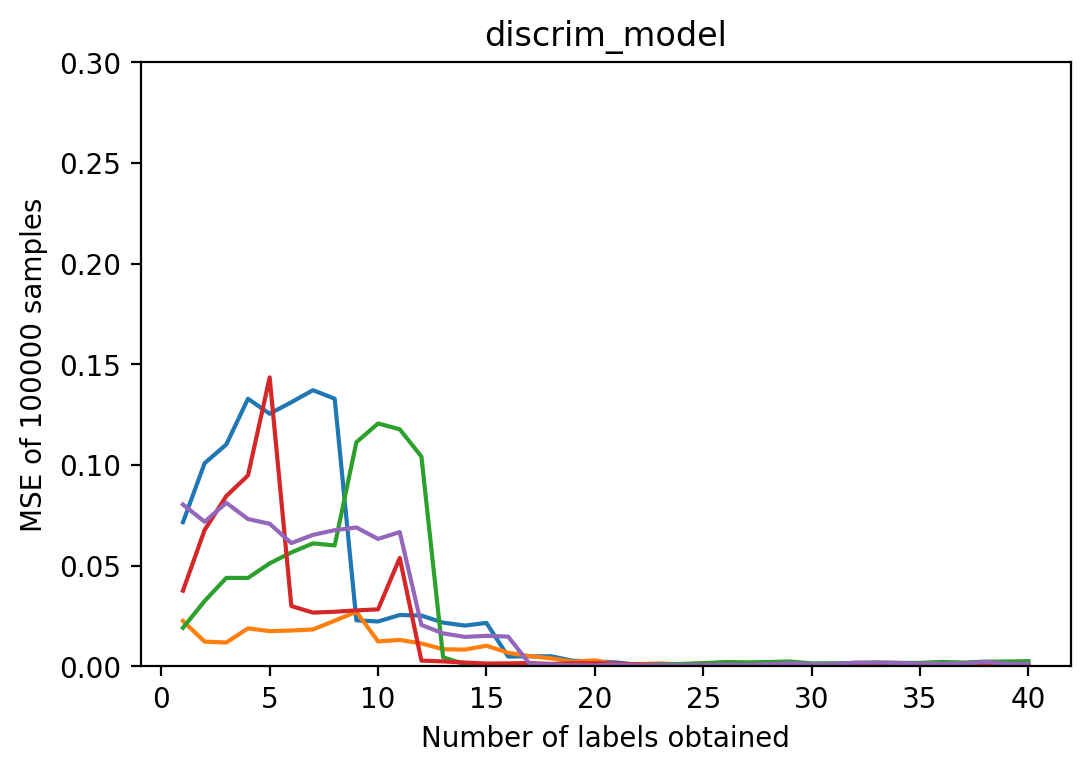

In [68]:
for k in eval_dict.keys():
    plt.figure(figsize=(6,4),dpi=200)
    for o in eval_dict[k]:
        plt.plot(range(1,1+len(o)),o)
    plt.ylim(0,0.3)
    plt.xlabel('Number of labels obtained')
    plt.ylabel('MSE of 100000 samples')
    plt.title(k)

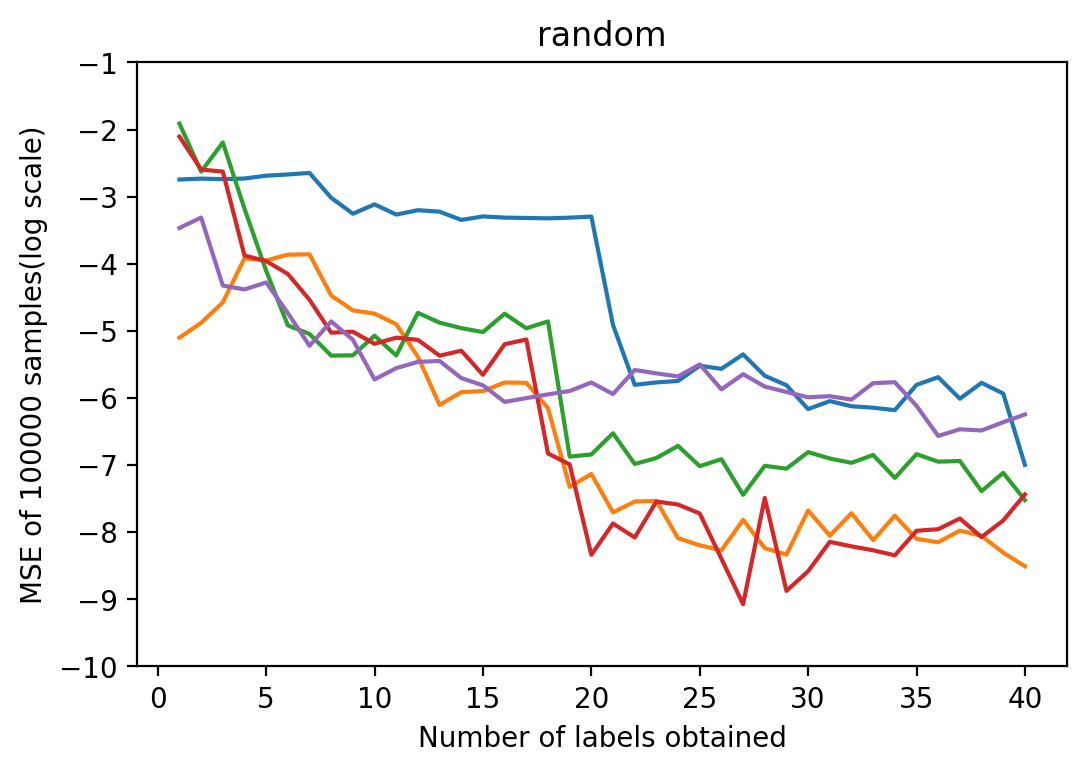

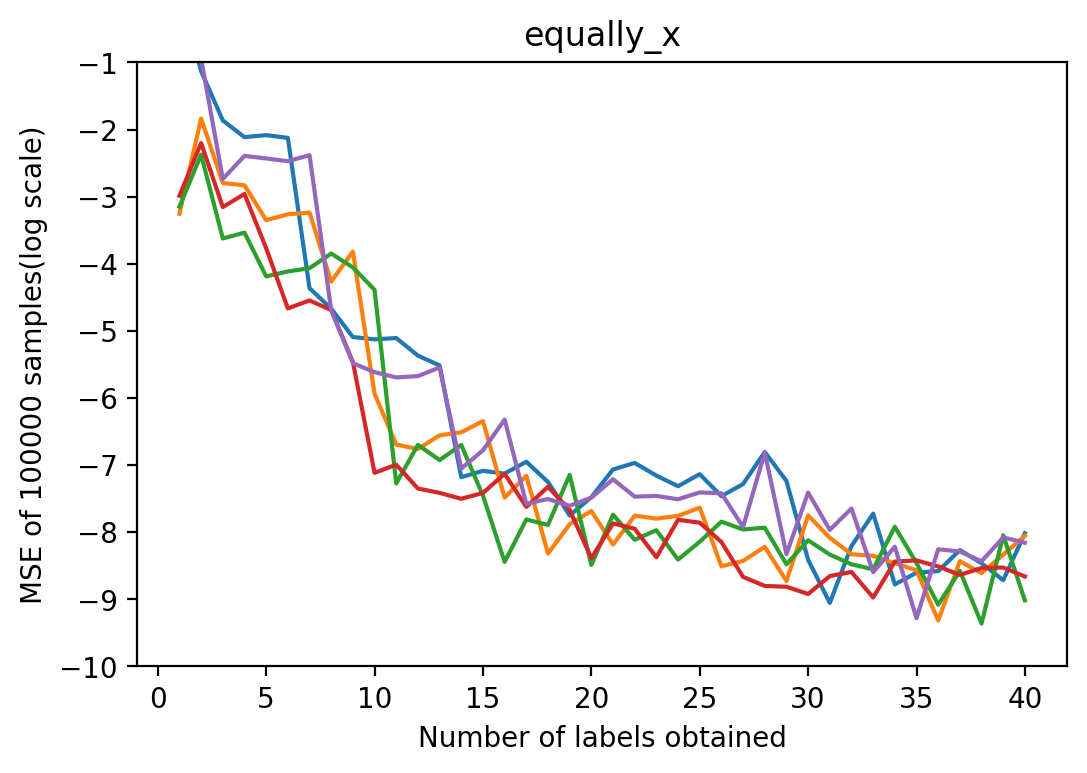

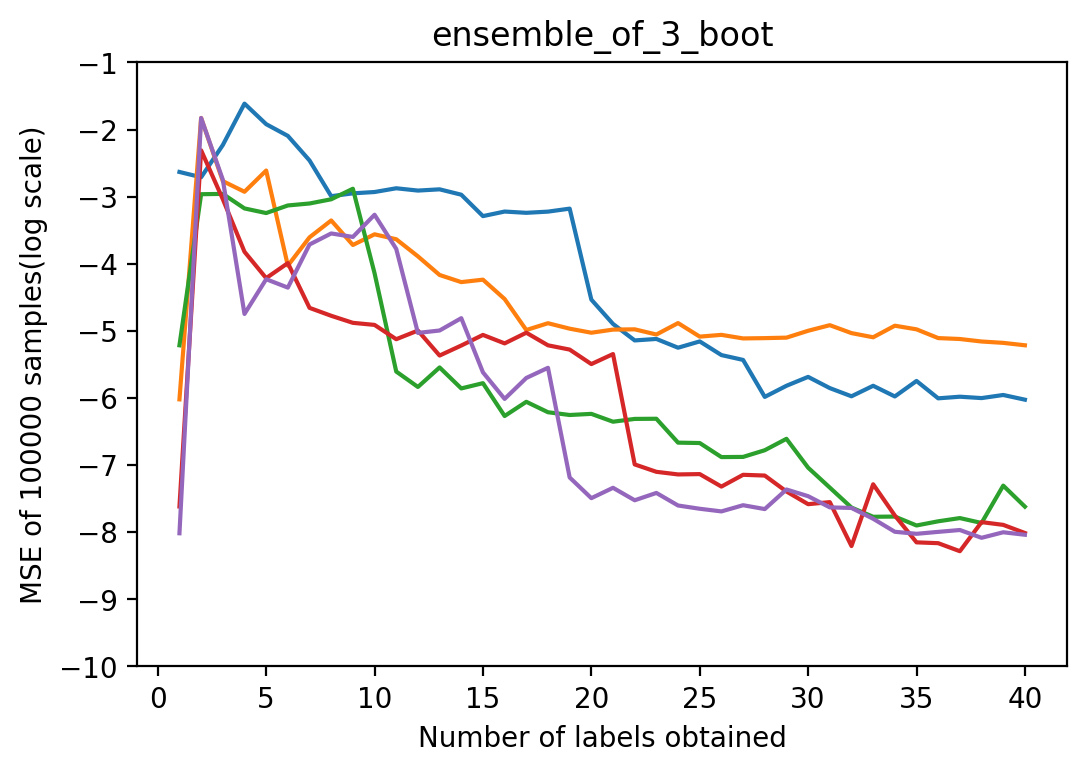

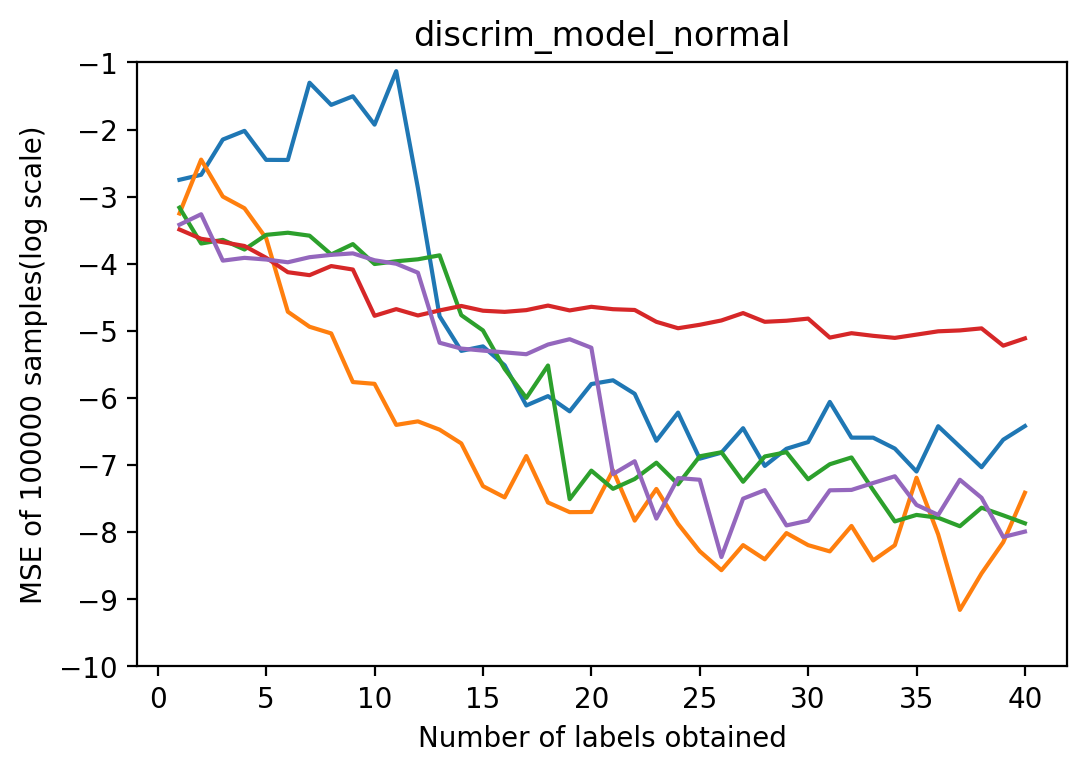

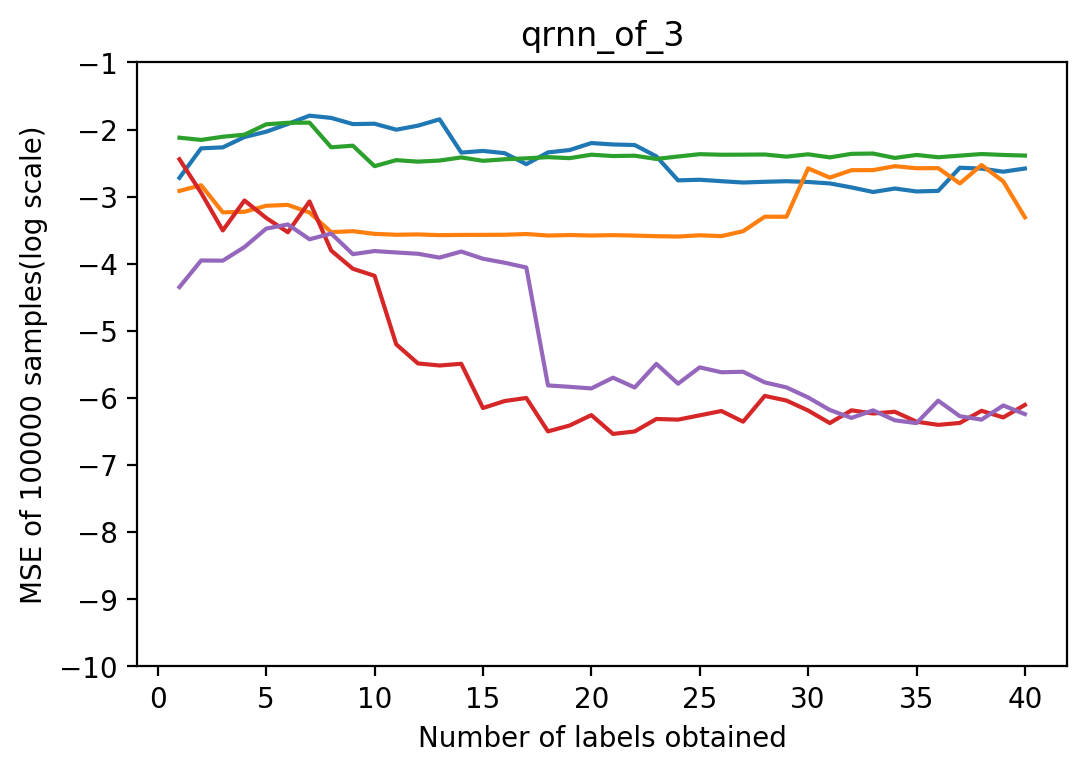

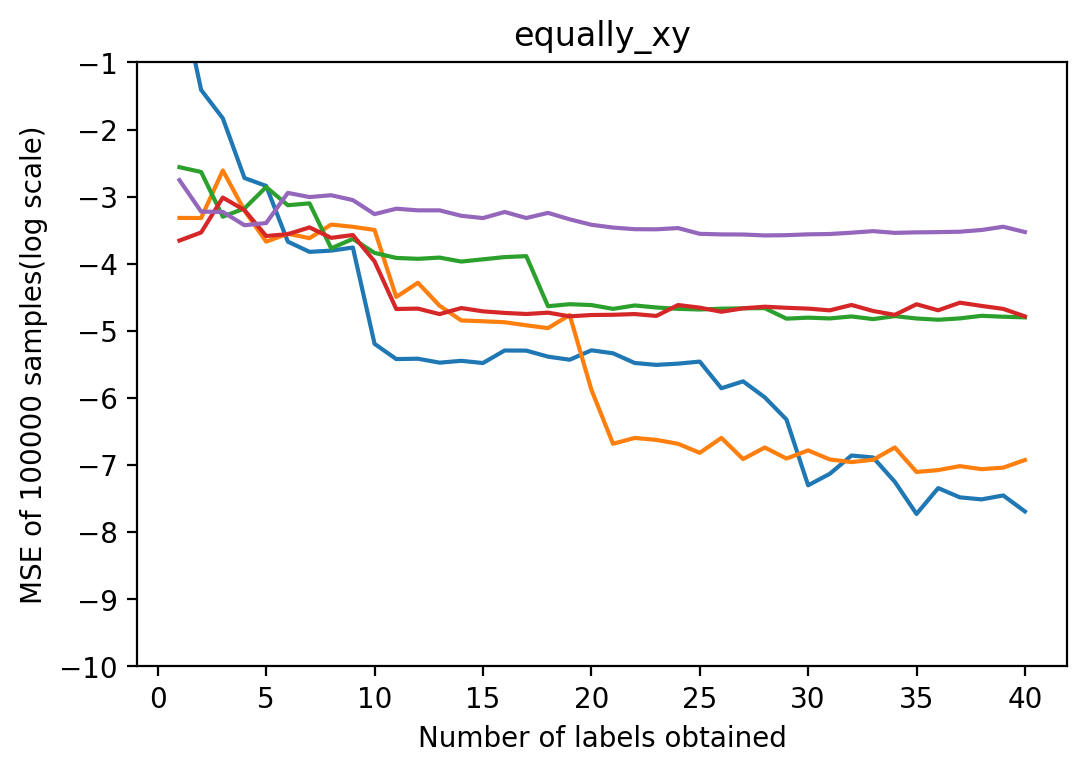

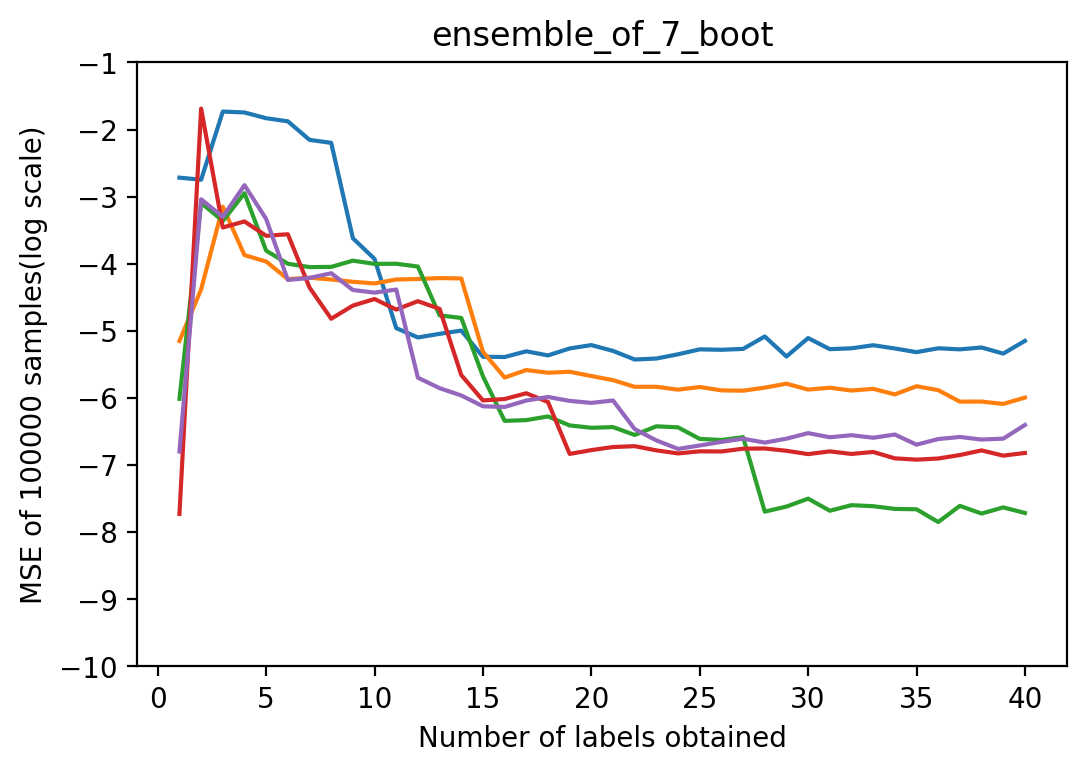

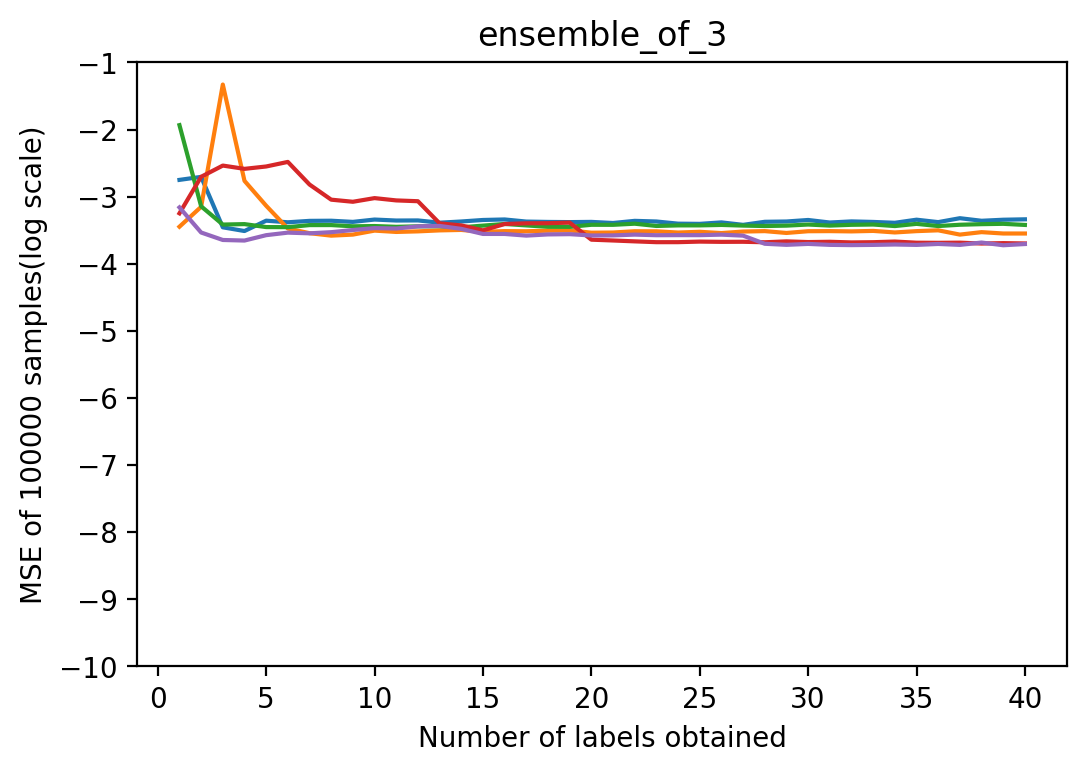

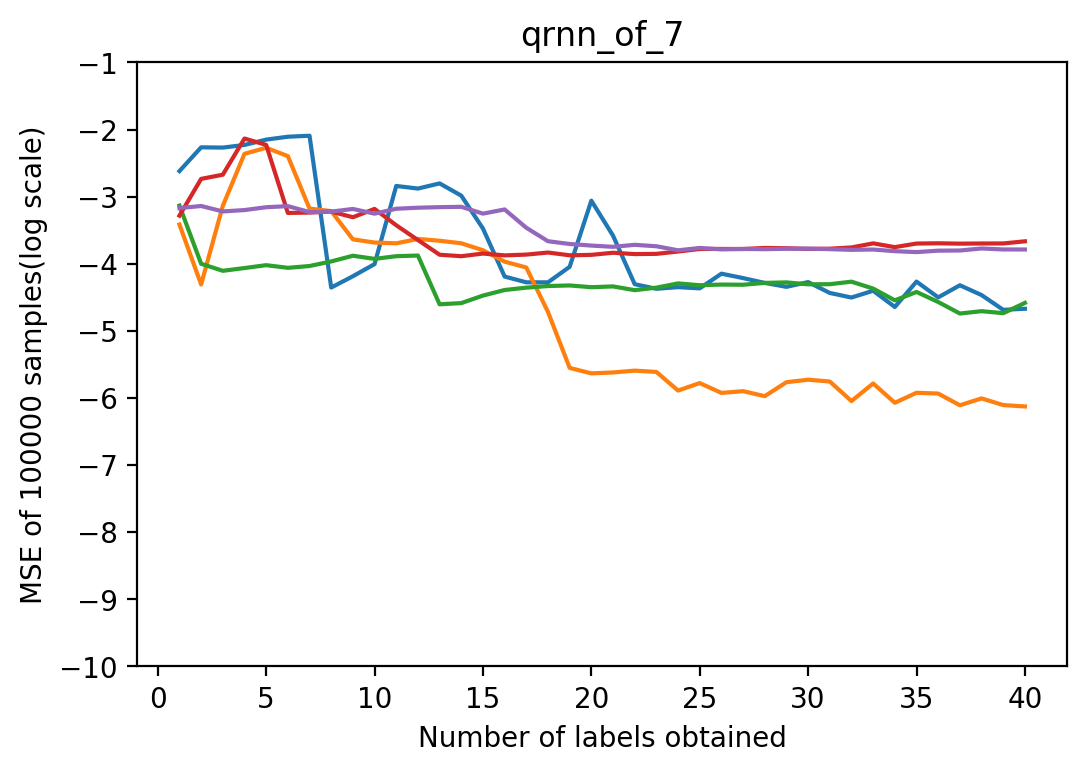

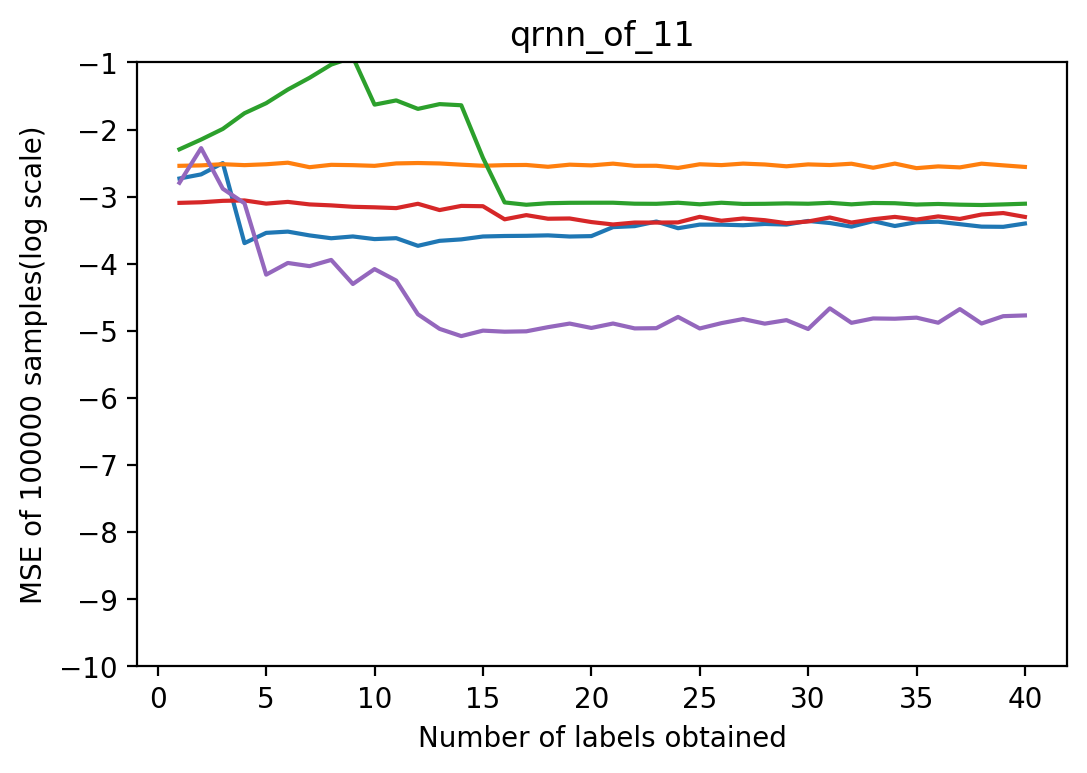

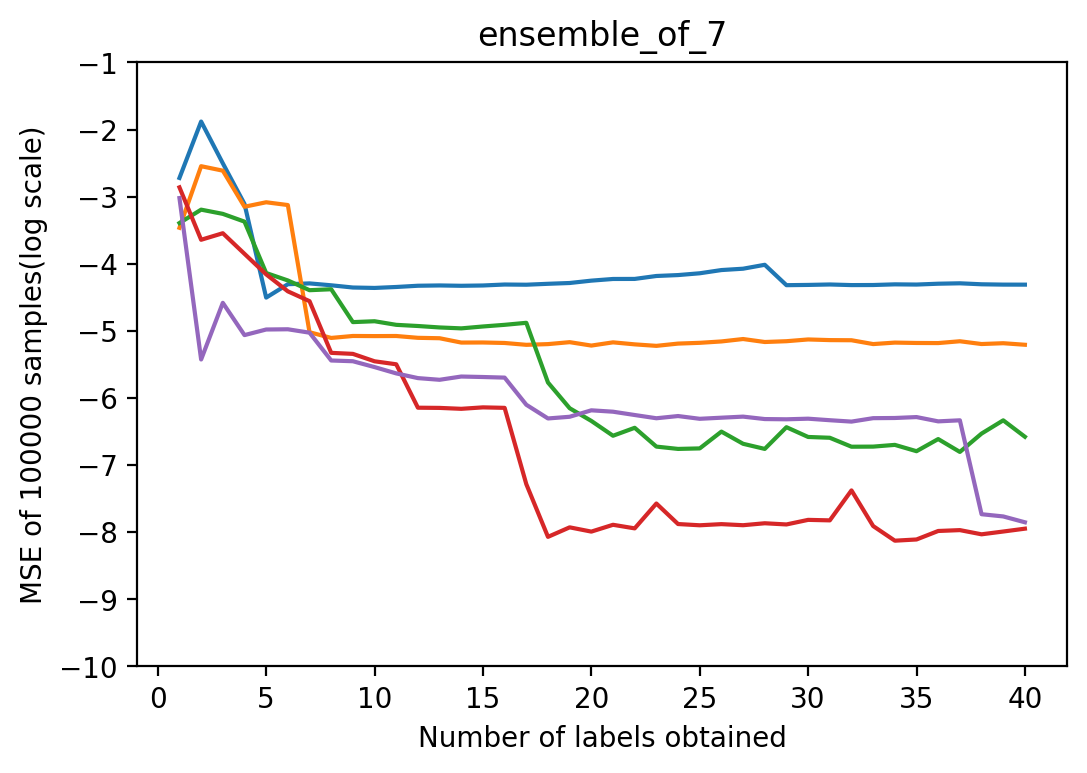

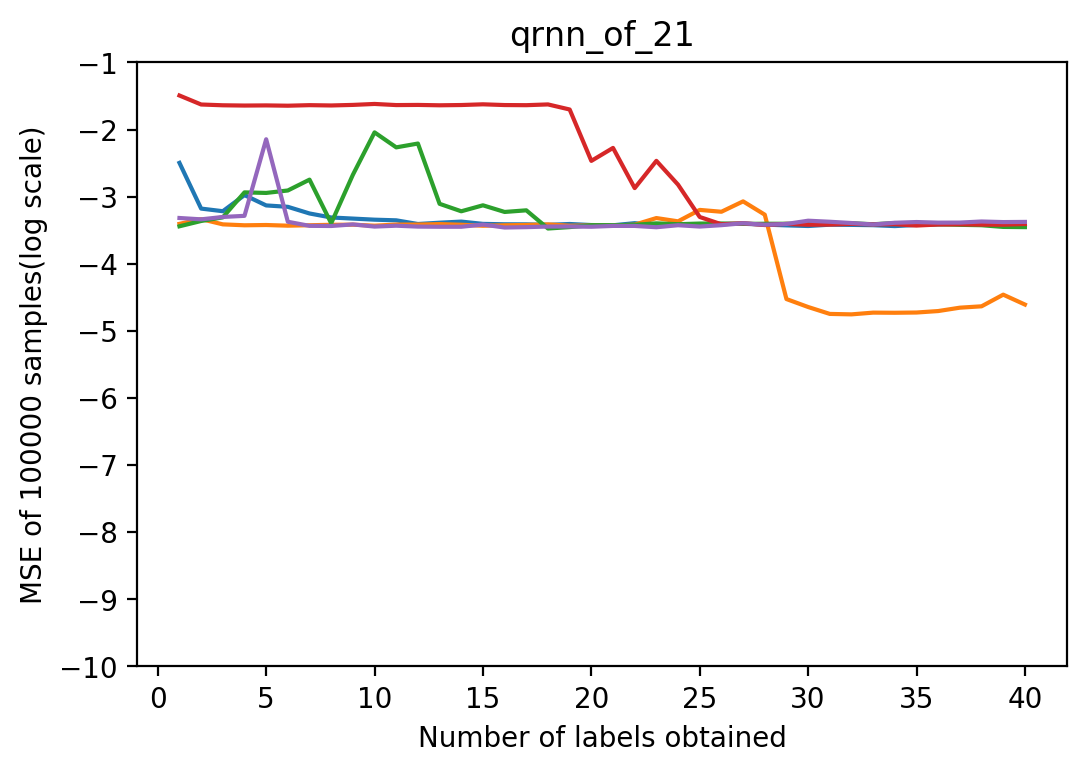

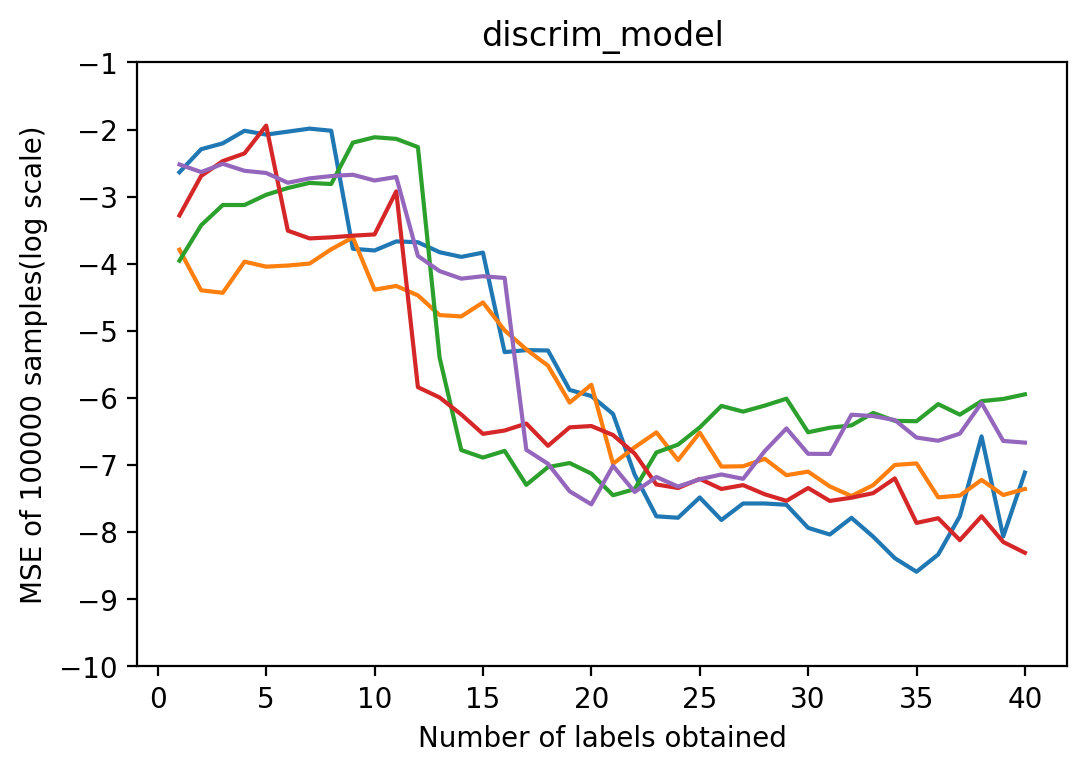

In [73]:
for k in eval_dict.keys():
    plt.figure(figsize=(6,4),dpi=200)
    for o in eval_dict[k]:
        plt.plot(range(1,1+len(o)),np.log(o))
    plt.ylim(-10,-1)
    plt.xlabel('Number of labels obtained')
    plt.ylabel('MSE of 100000 samples(log scale)')
    plt.title(k)

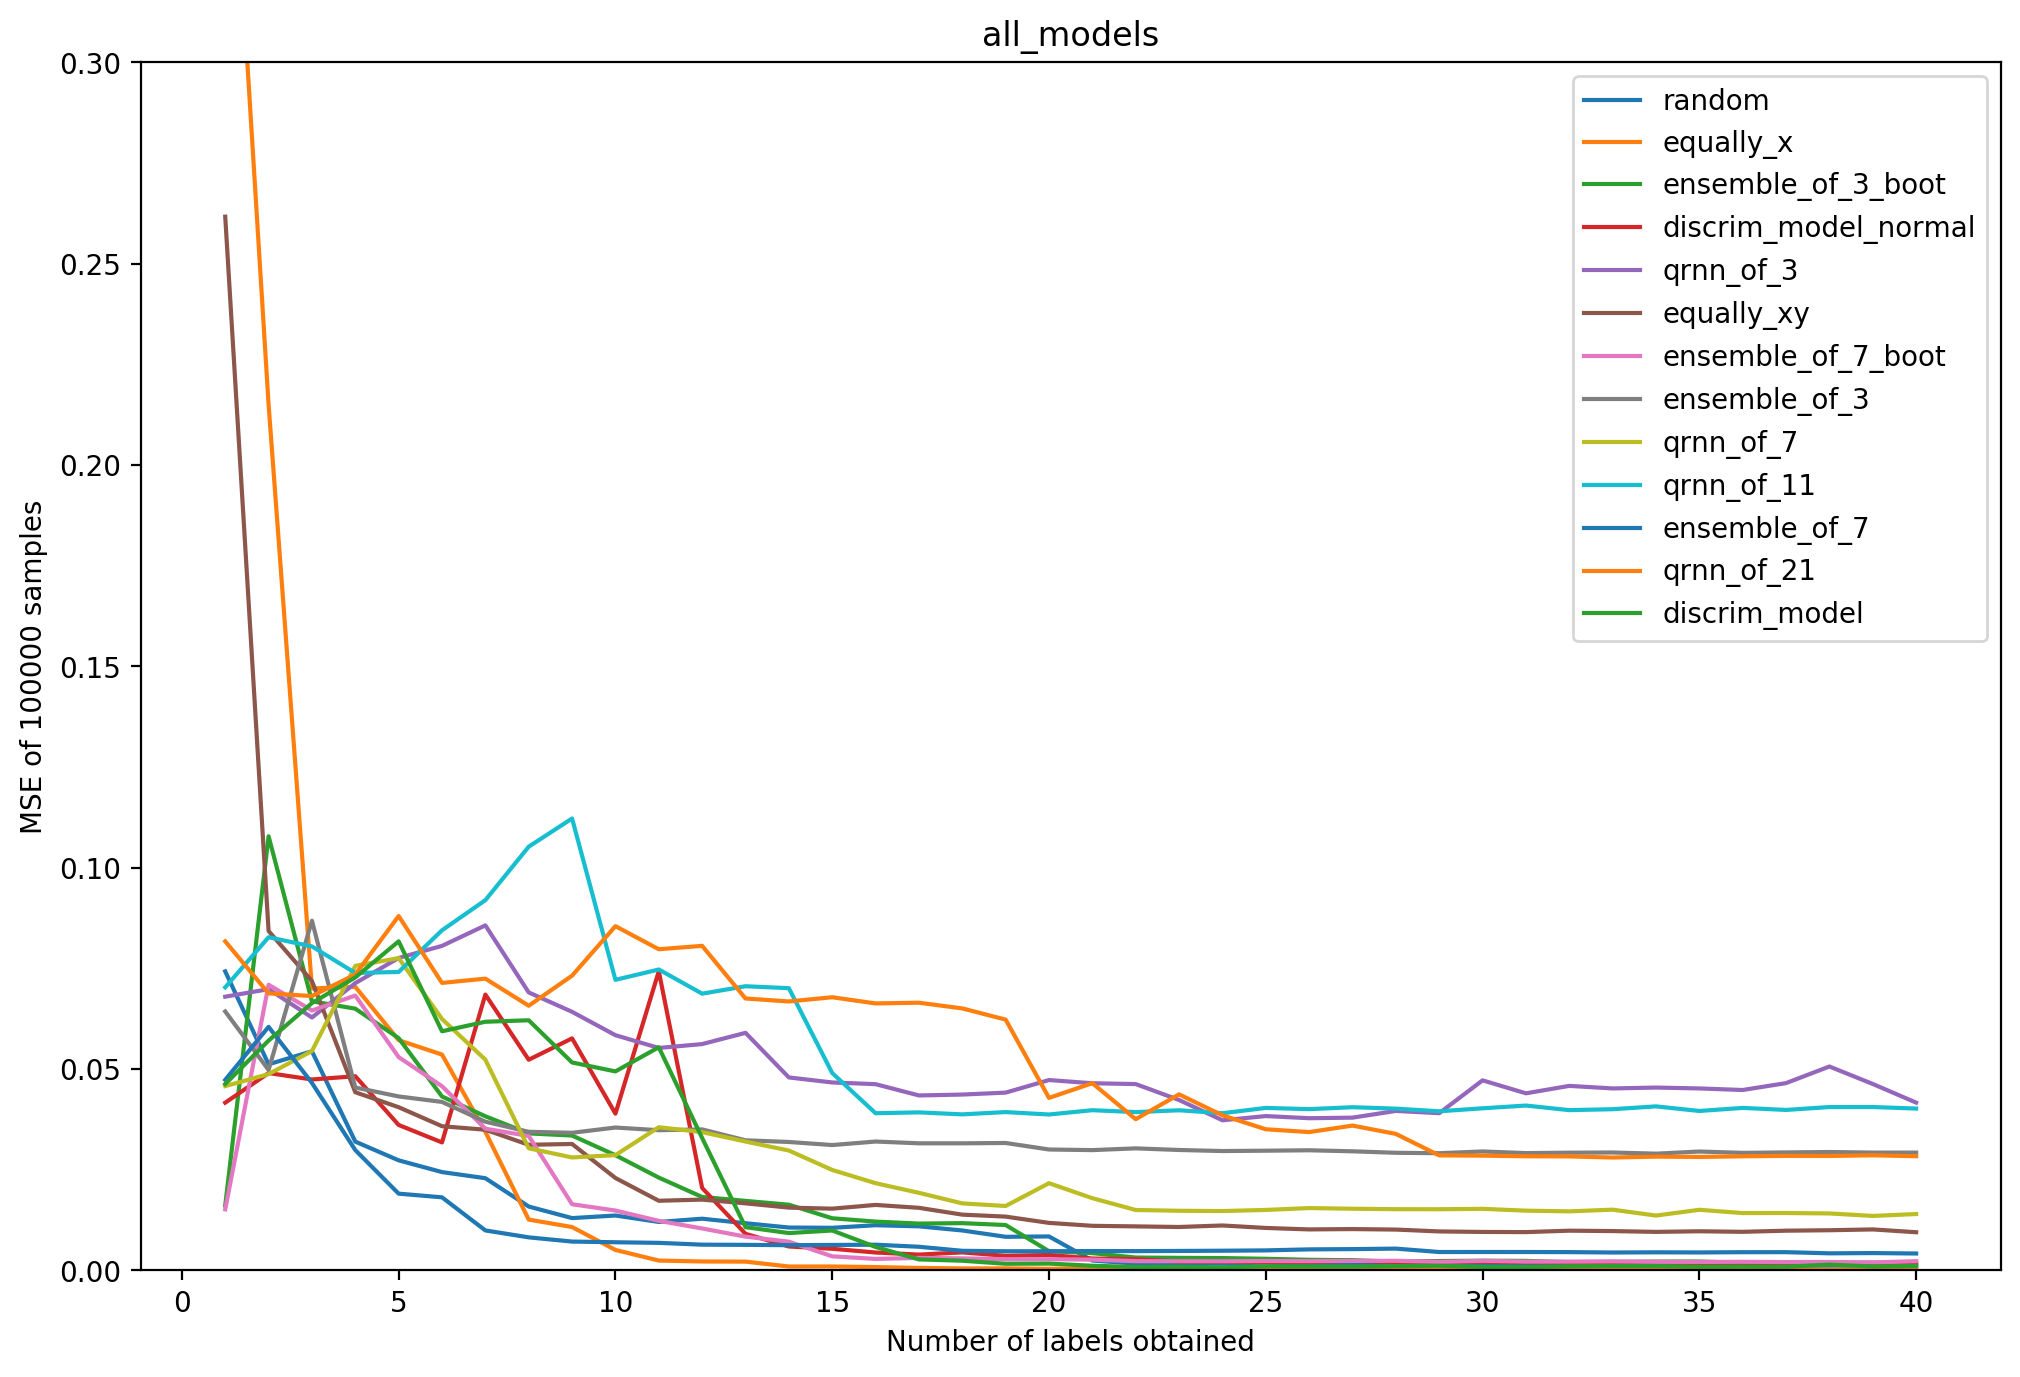

In [78]:
plt.figure(figsize=(12,8),dpi=200)
for k in eval_dict.keys():
    plt.plot(range(1,1+len(eval_dict[k].mean(axis=0))),eval_dict[k].mean(axis=0),label=k)
plt.ylim(0,0.3)
plt.xlabel('Number of labels obtained')
plt.ylabel('MSE of 100000 samples')
plt.title('all_models')
plt.legend()

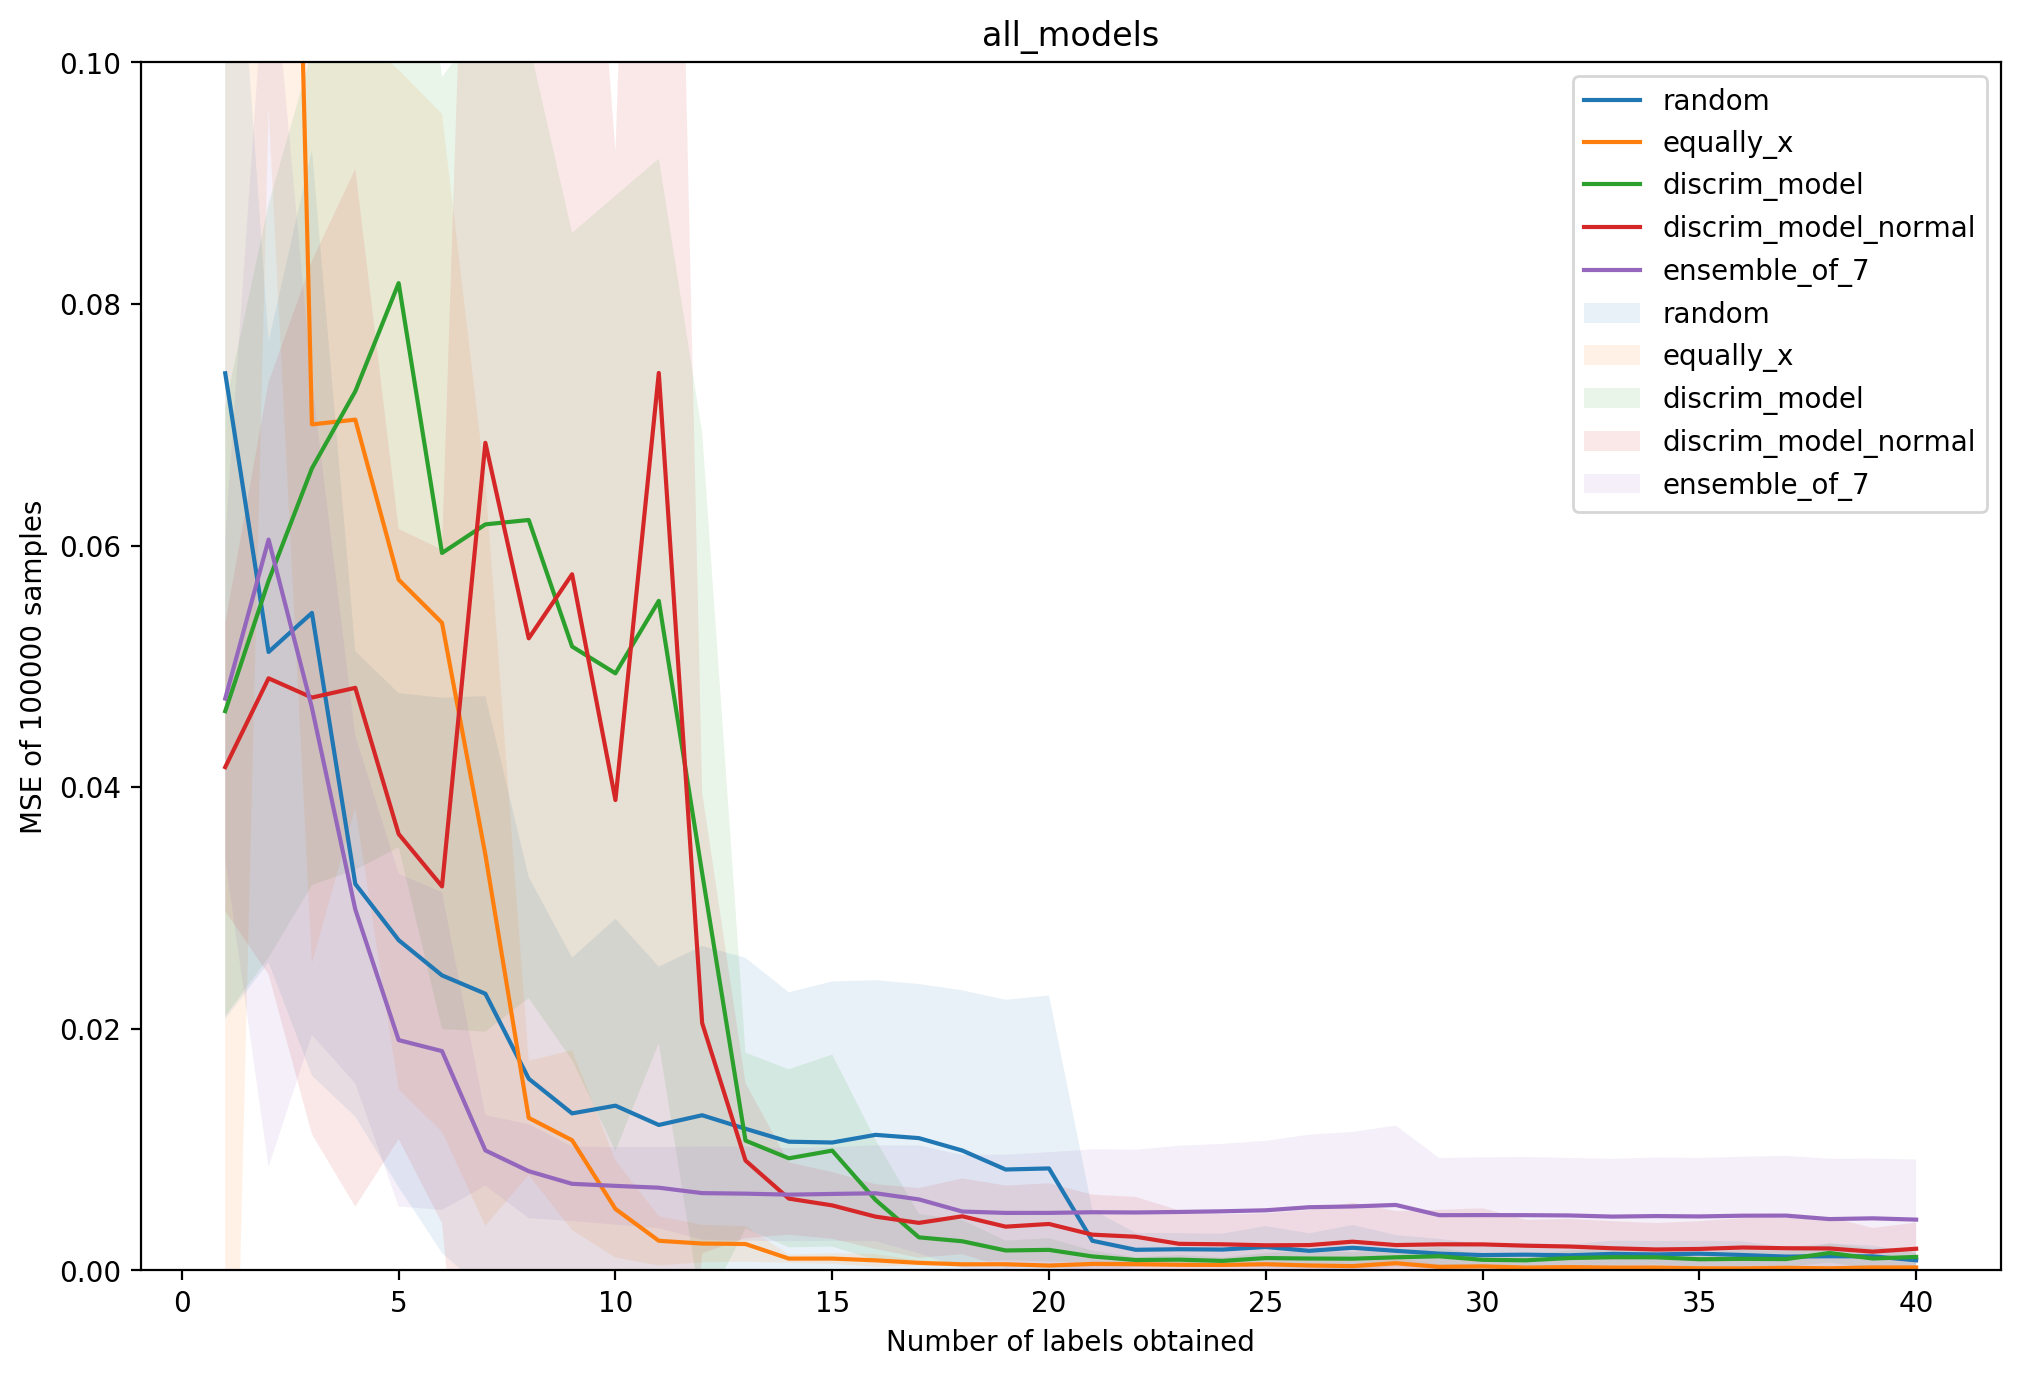

In [148]:
select_orderd_keys = [
    'random',
    'equally_x',
     'discrim_model',
    'discrim_model_normal',
    'ensemble_of_7',
#    'qrnn_of_7',
   ]
plt.figure(figsize=(12,8),dpi=200)
for k in select_orderd_keys:
    plt.plot(range(1,1+len(eval_dict[k].mean(axis=0))),eval_dict[k].mean(axis=0),label=k)
    plt.fill_between(range(1,1+len(eval_dict[k].mean(axis=0))),
                               eval_dict[k].mean(axis=0)-eval_dict[k].std(axis=0),
                             eval_dict[k].mean(axis=0)+eval_dict[k].std(axis=0),
                            label=k,alpha=0.1)
plt.ylim(0,0.1)
# plt.yscale('log')
plt.xlabel('Number of labels obtained')
plt.ylabel('MSE of 100000 samples')
plt.title('all_models')
plt.legend()

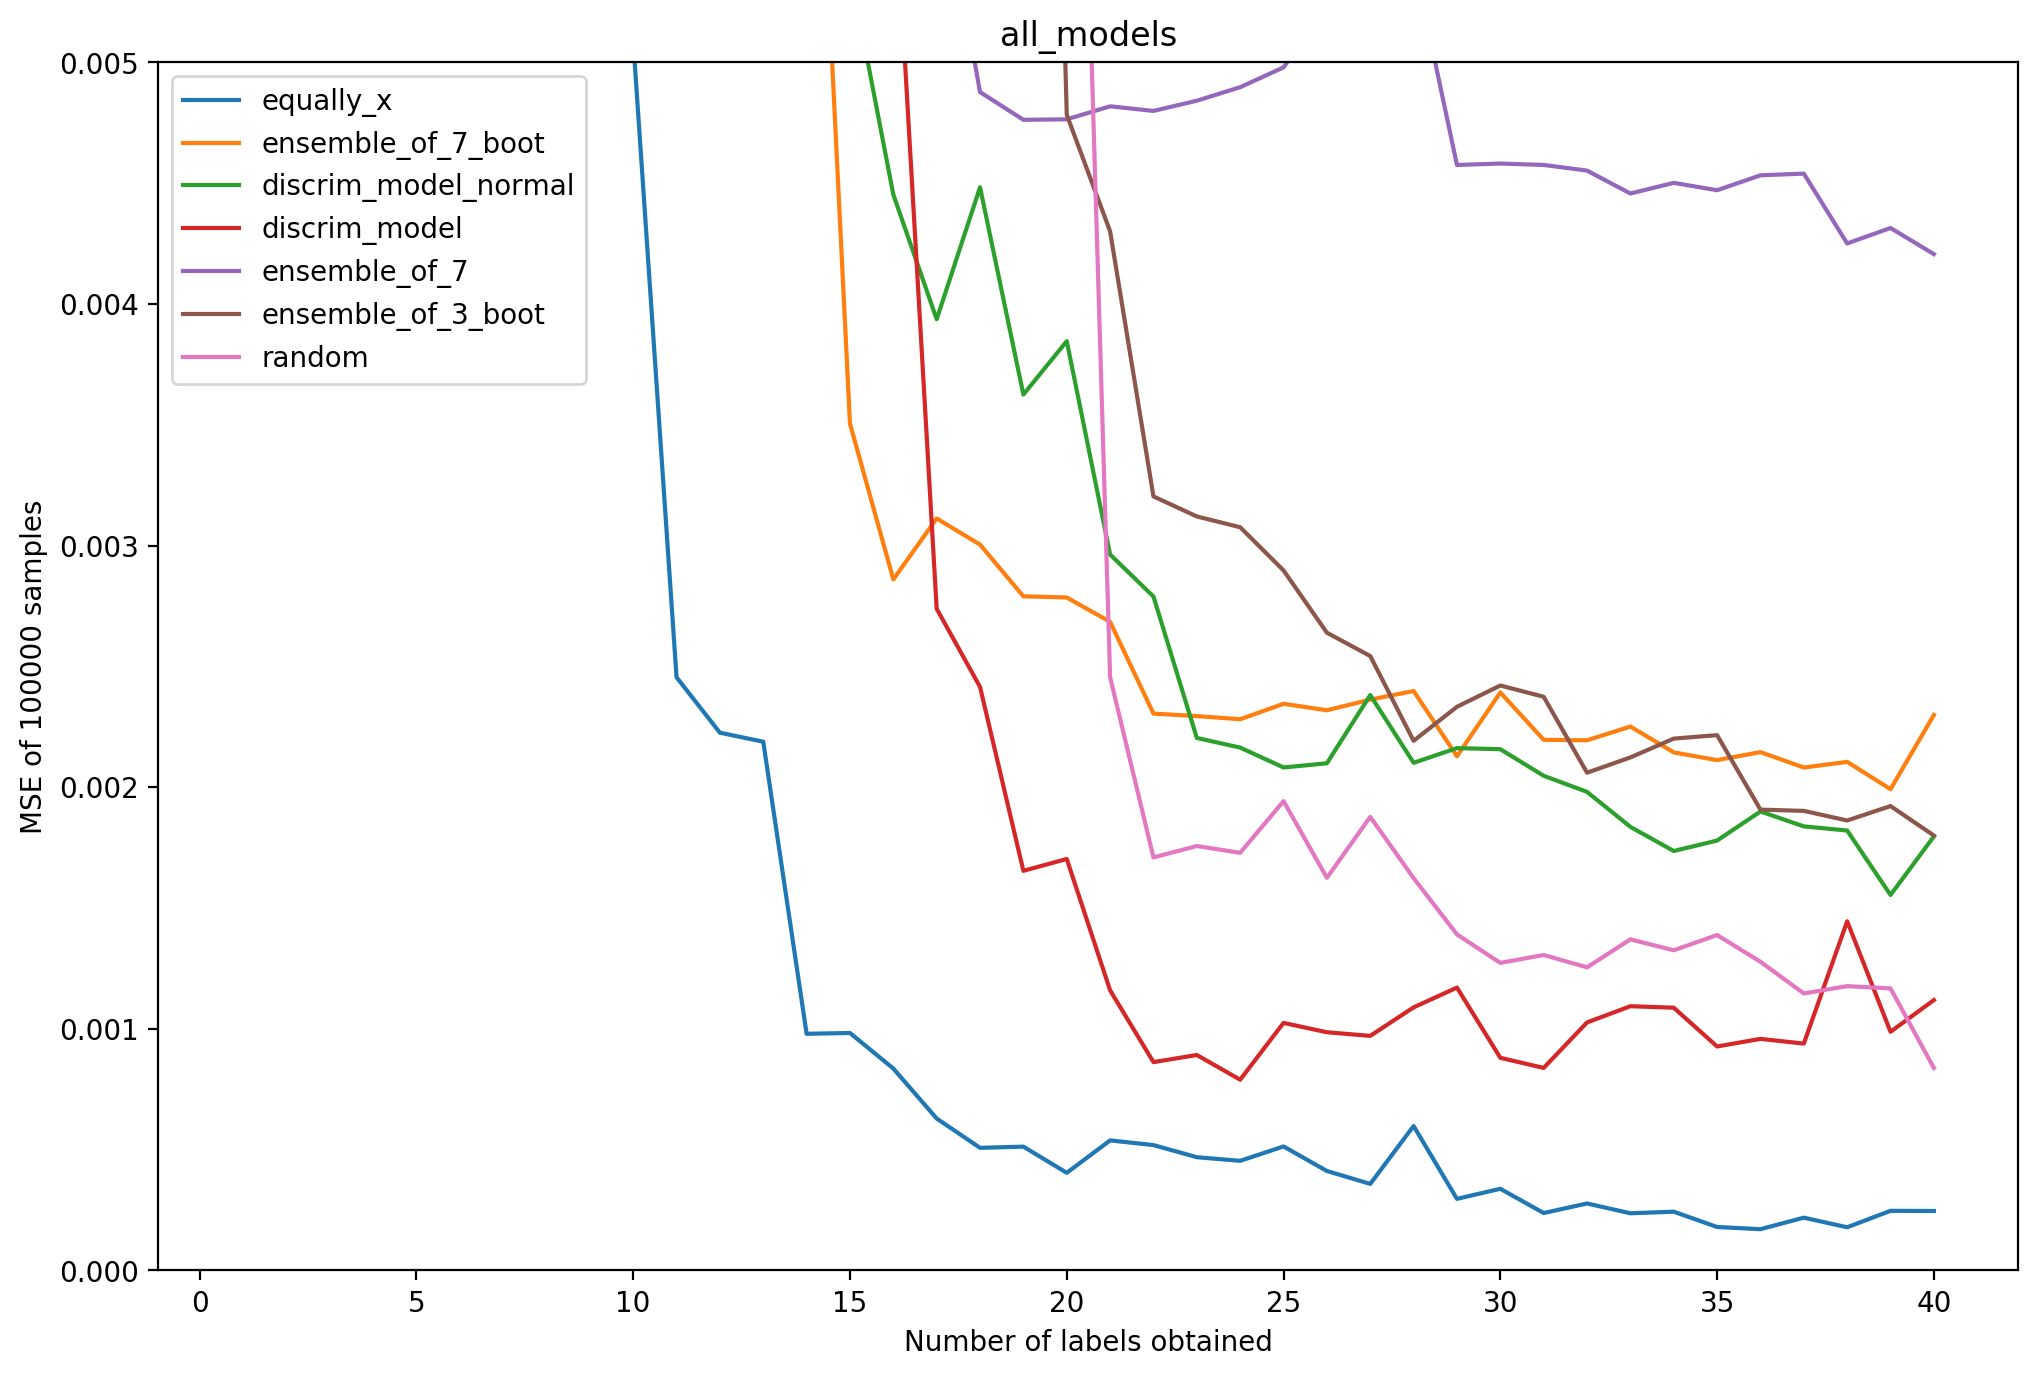

In [158]:
orderd_keys = [
    'equally_x',
    'ensemble_of_7_boot',
     'discrim_model_normal',
     'discrim_model',
     'ensemble_of_7',
    'ensemble_of_3_boot',
    'random',
    ]
plt.figure(figsize=(12,8),dpi=200)
for k in orderd_keys:
    plt.plot(range(1,1+len(eval_dict[k].mean(axis=0))),eval_dict[k].mean(axis=0),label=k)
plt.ylim(0,0.005)
plt.xlabel('Number of labels obtained')
plt.ylabel('MSE of 100000 samples')
plt.title('all_models')
plt.legend()

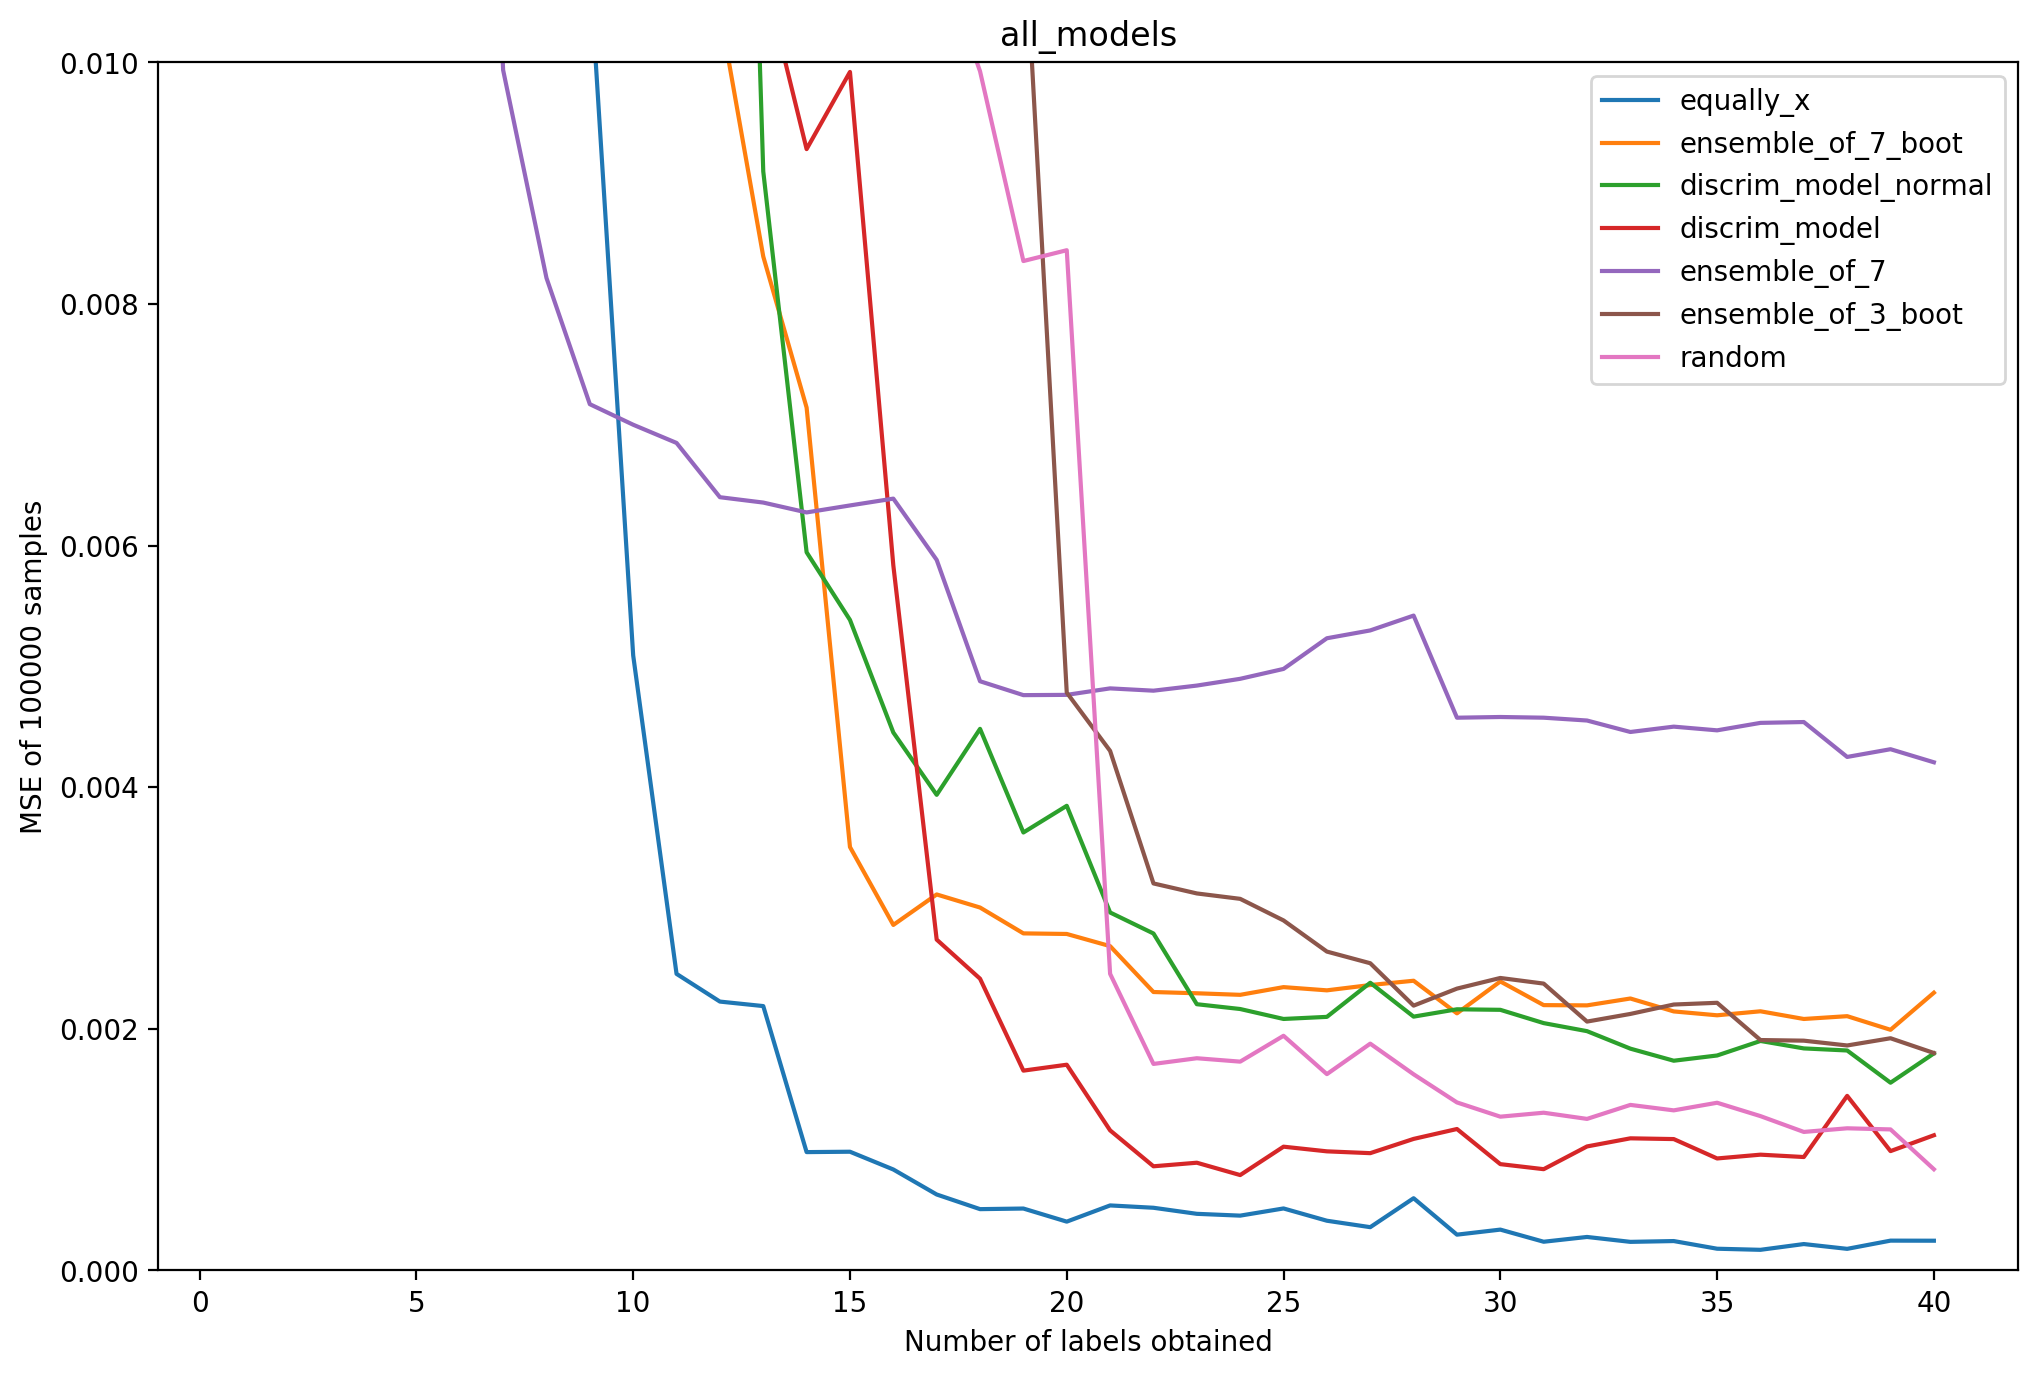

In [159]:
orderd_keys = [
    'equally_x',
    'ensemble_of_7_boot',
     'discrim_model_normal',
     'discrim_model',
     'ensemble_of_7',
    'ensemble_of_3_boot',
    'random',
    ]
plt.figure(figsize=(12,8),dpi=200)
for k in orderd_keys:
    plt.plot(range(1,1+len(eval_dict[k].mean(axis=0))),eval_dict[k].mean(axis=0),label=k)
plt.ylim(0,0.01)
plt.xlabel('Number of labels obtained')
plt.ylabel('MSE of 100000 samples')
plt.title('all_models')
plt.legend()

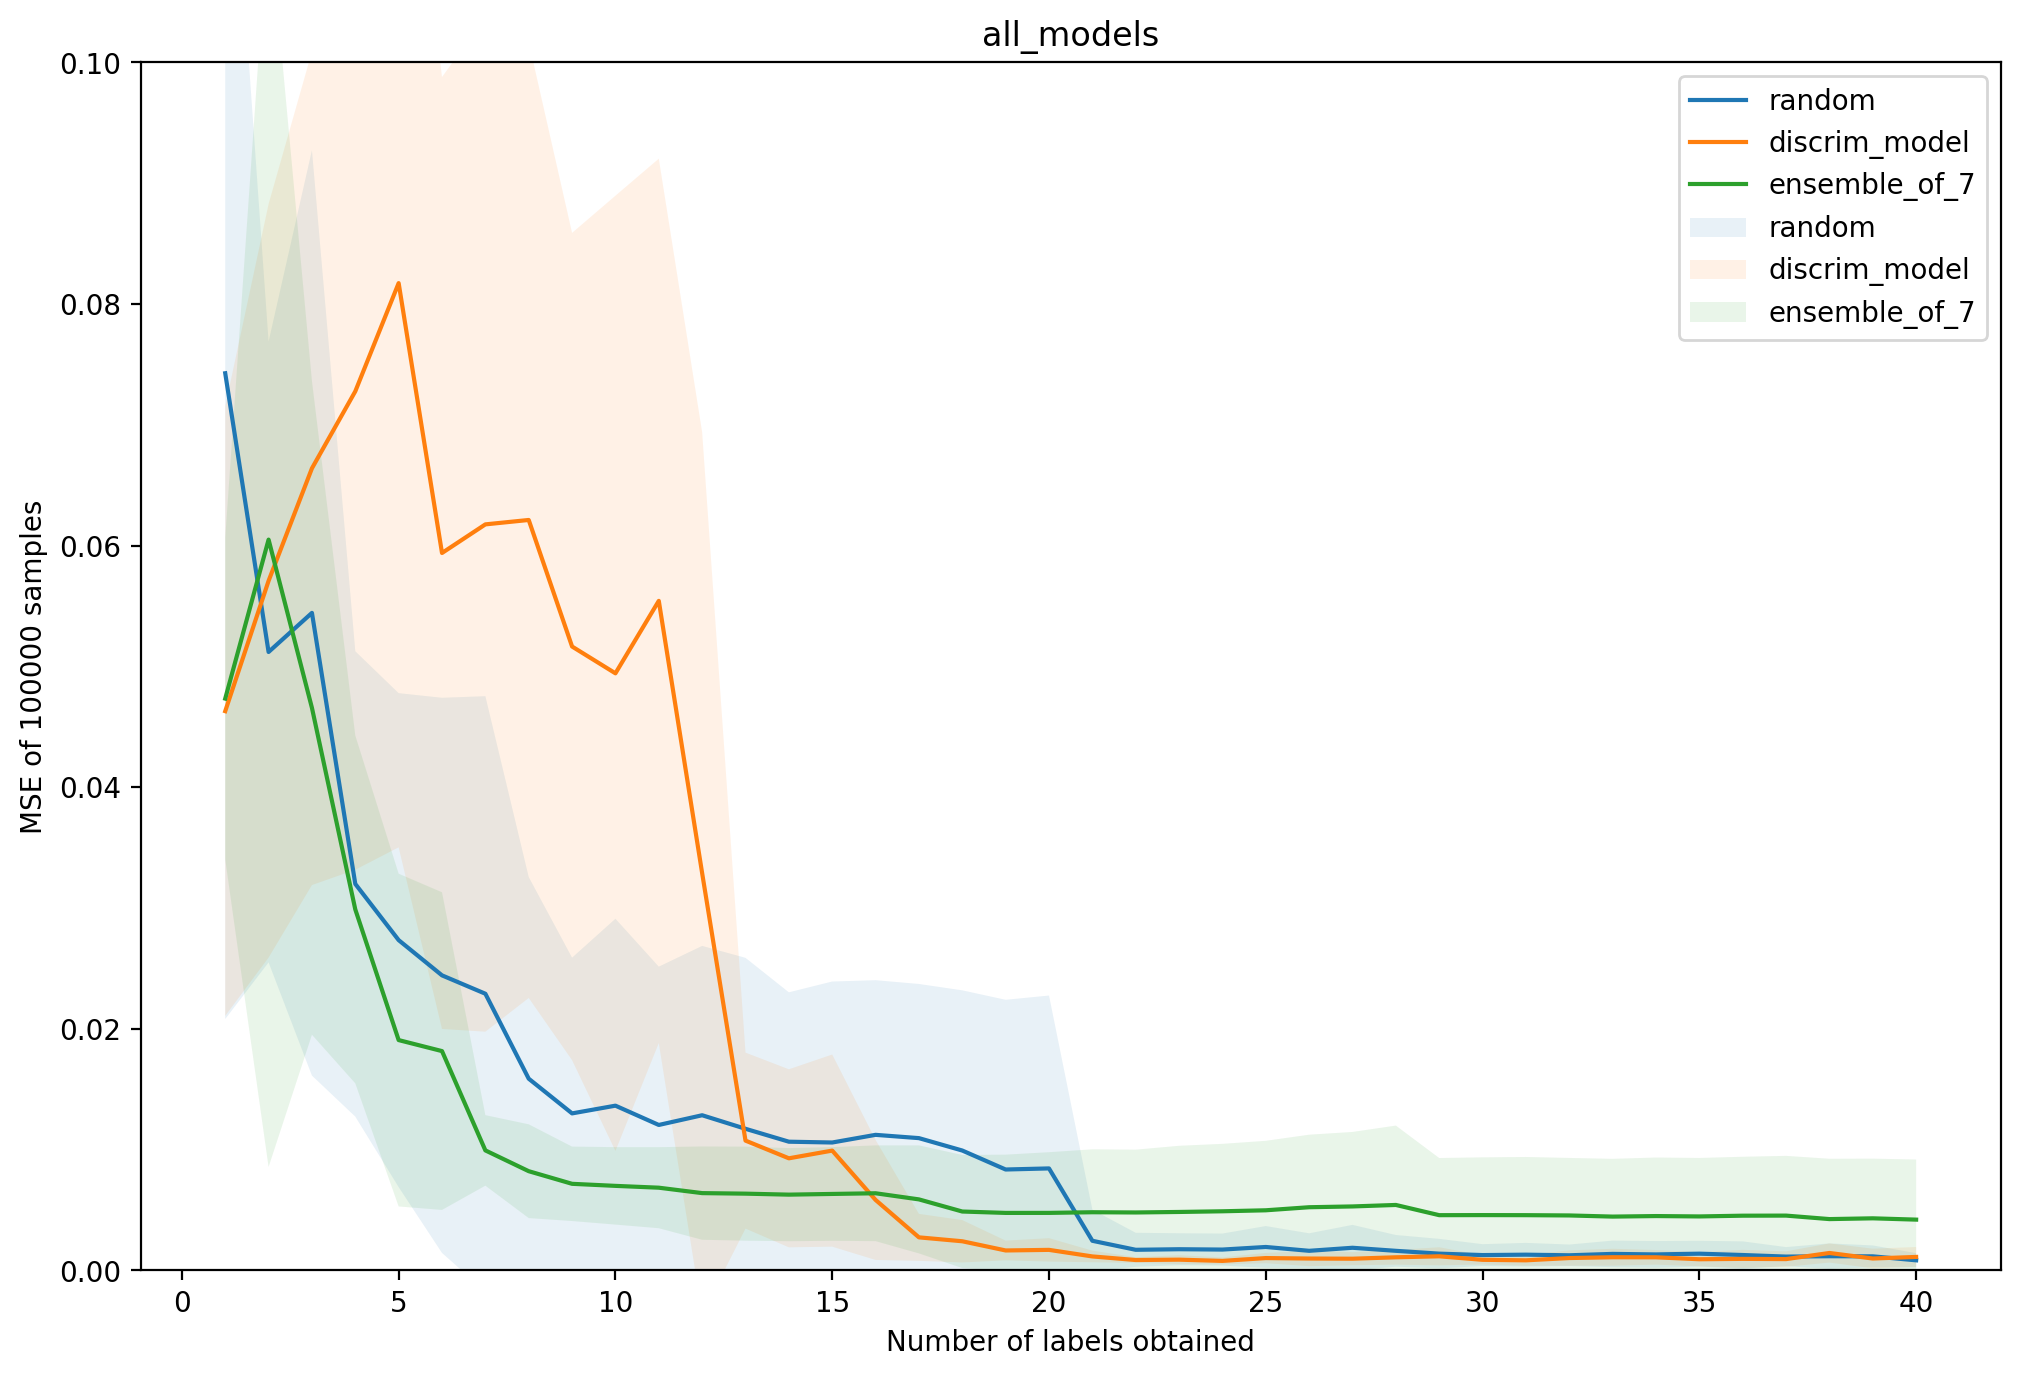

In [147]:
orderd_keys = [
    'equally_x',
    'ensemble_of_7',
    'ensemble_of_7_boot',
     'discrim_model_normal',
     'discrim_model',
     'ensemble_of_7',
    'ensemble_of_3_boot',
    'random',
    ]
plt.figure(figsize=(12,8),dpi=200)
for k in select_orderd_keys:
    plt.plot(range(1,1+len(eval_dict[k].mean(axis=0))),eval_dict[k].mean(axis=0),label=k)
    #plt.fill_between(range(1,1+len(eval_dict[k].mean(axis=0))),
     #                          eval_dict[k].mean(axis=0)-eval_dict[k].std(axis=0),
      #                       eval_dict[k].mean(axis=0)+eval_dict[k].std(axis=0),
       #                     label=k,alpha=0.1)
plt.ylim(0,0.1)
# plt.yscale('log')
plt.xlabel('Number of labels obtained')
plt.ylabel('MSE of 100000 samples')
plt.title('all_models')
plt.legend()

In [102]:
eval_dict.keys()

dict_keys(['random', 'equally_x', 'ensemble_of_3_boot', 'discrim_model_normal', 'qrnn_of_3', 'equally_xy', 'ensemble_of_7_boot', 'ensemble_of_3', 'qrnn_of_7', 'qrnn_of_11', 'ensemble_of_7', 'qrnn_of_21', 'discrim_model'])

In [107]:
orderd_keys = [
    'random',
    'equally_x',
    'equally_xy',
     'discrim_model',
    'discrim_model_normal',
    'ensemble_of_3',
    'ensemble_of_3_boot',
    'ensemble_of_7',
    'ensemble_of_7_boot',
    'qrnn_of_3',
    'qrnn_of_7',
    'qrnn_of_11',
    'qrnn_of_21']

In [125]:
tocsv = [orderd_keys,
            [str(float(np.mean(eval_dict[k].min(axis=1)))) for k in orderd_keys],
            [str(float(np.std(eval_dict[k].min(axis=1)))) for k in orderd_keys],
            [str(float(np.mean(eval_dict[k].sum(axis=1)))) for k in orderd_keys],
            [str(float(np.std(eval_dict[k].sum(axis=1)))) for k in orderd_keys],
        ]

In [128]:
import csv
def w_csv(f_name,data):
    with open(f_name, 'w') as f:
        writer = csv.writer(f, lineterminator='\n')
        writer.writerows(data)

In [129]:
w_csv('min_sum.csv',tocsv)

/home/lab/shigeharu/.pyenv/versions/3.6.5/envs/365g/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  app.launch_new_instance()


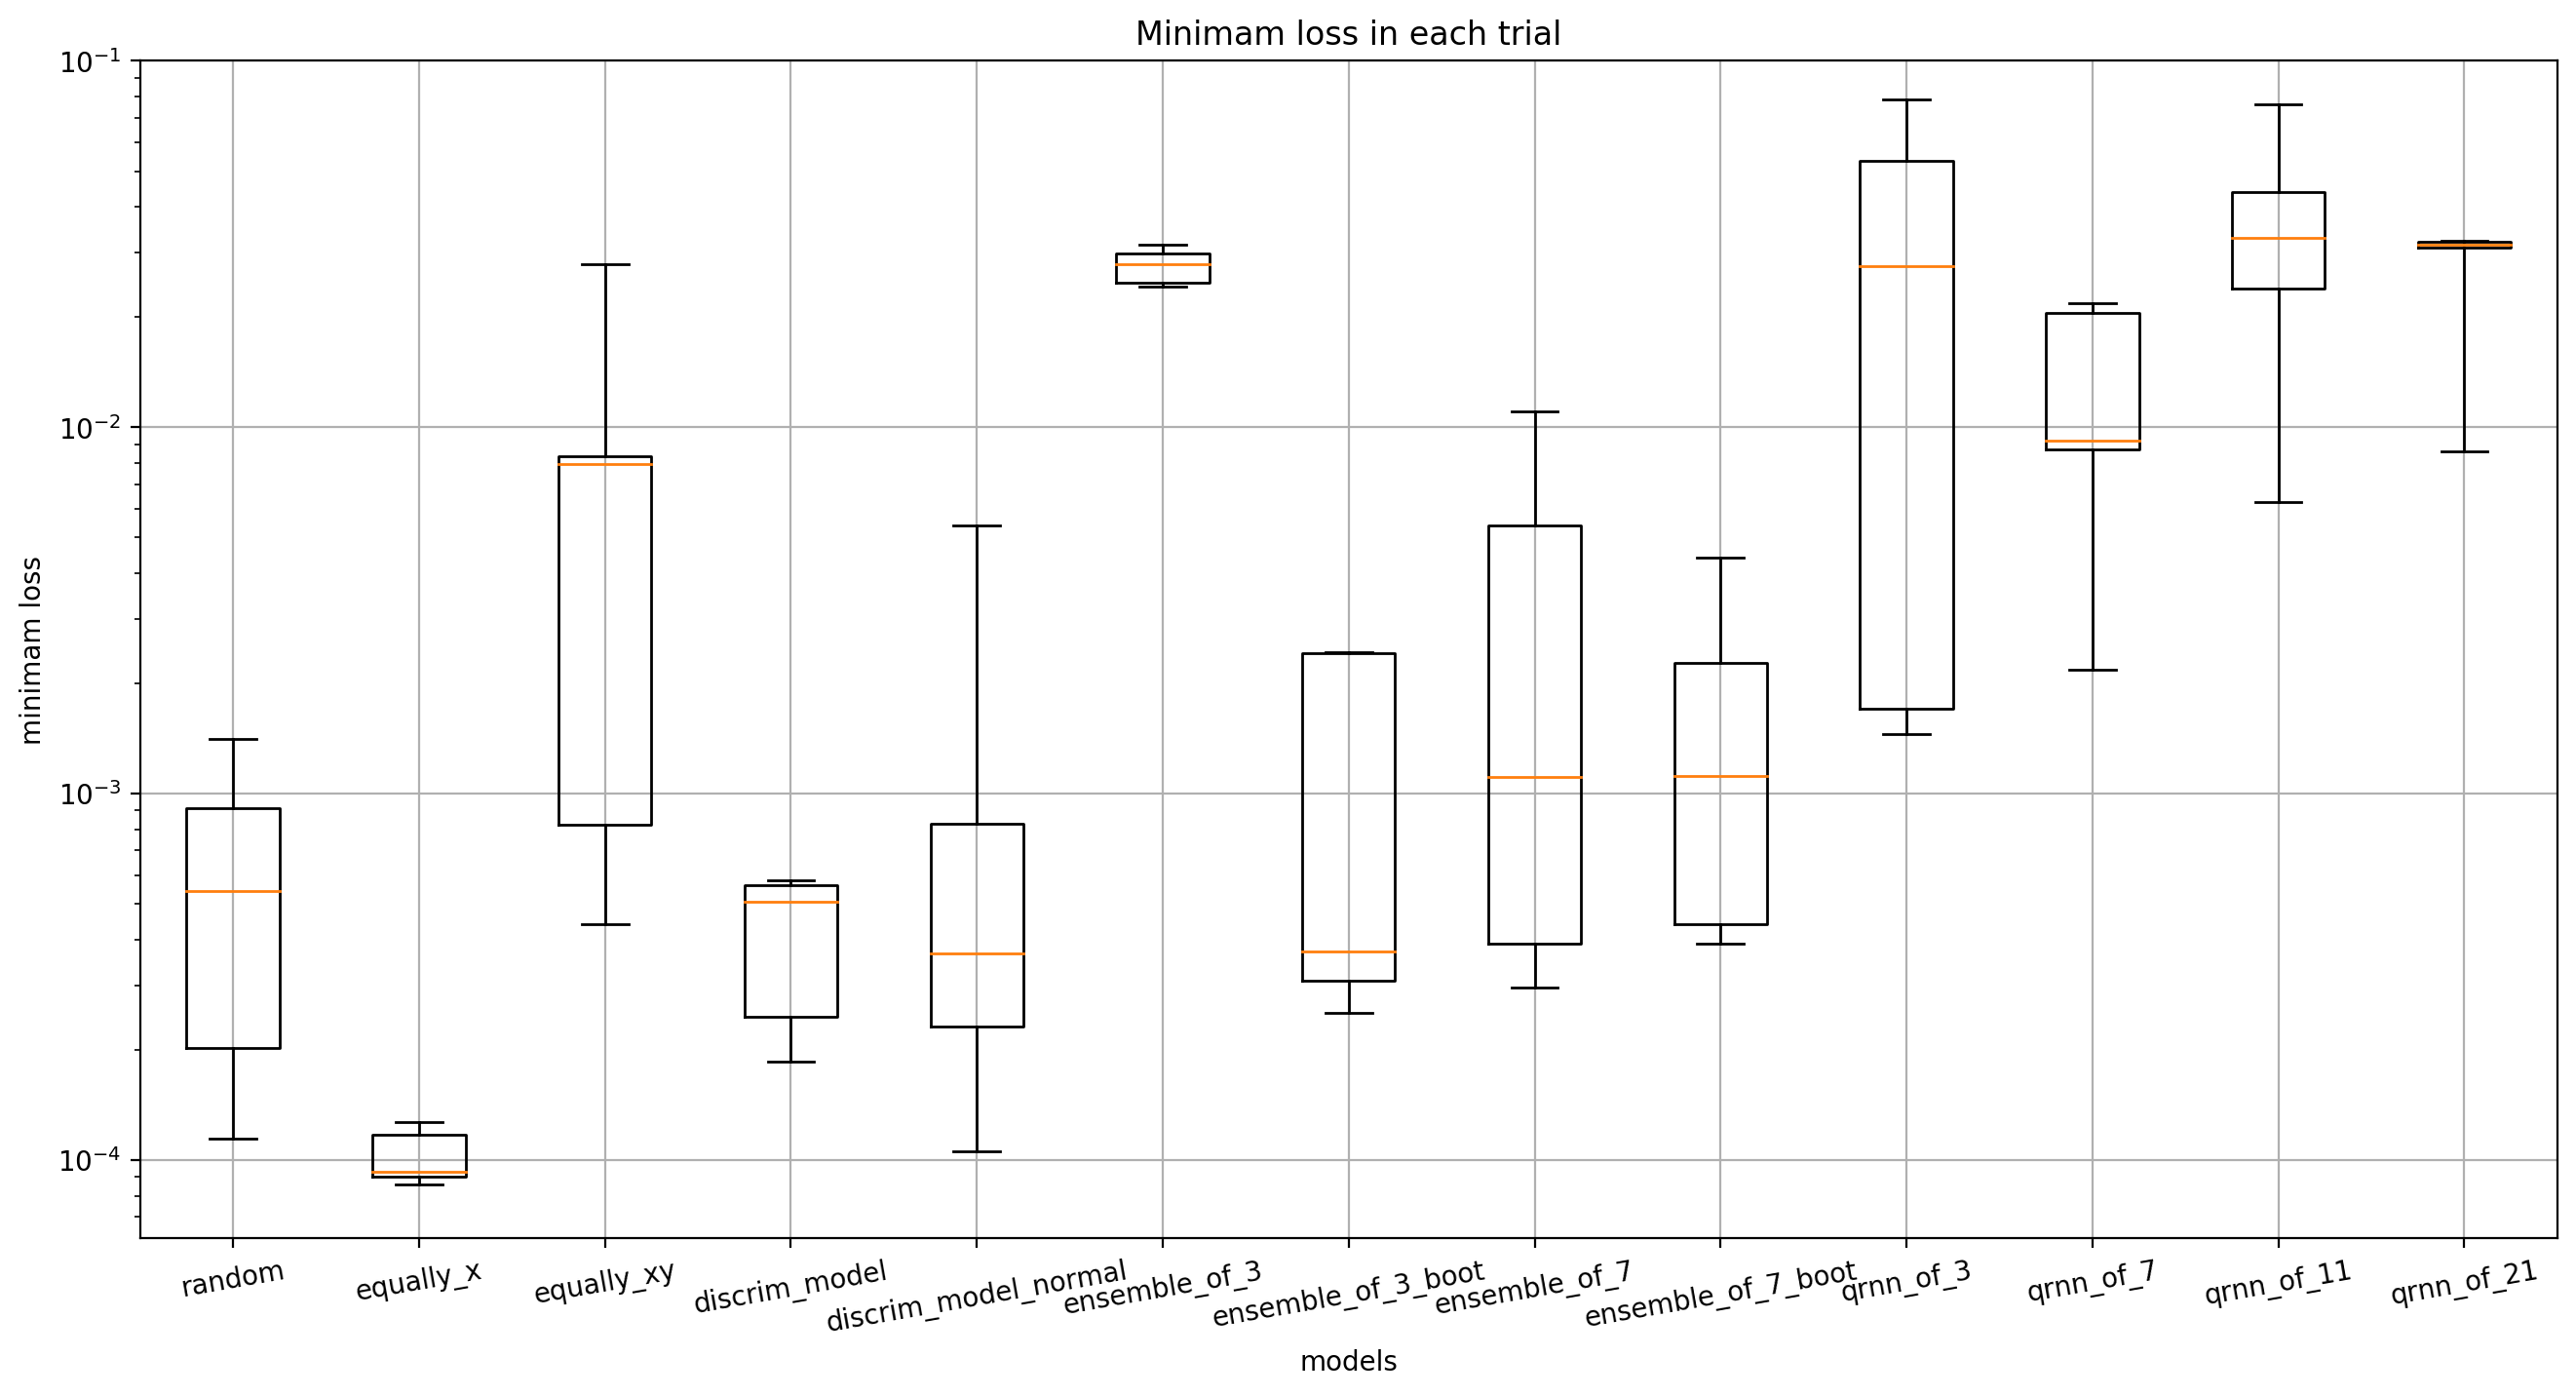

In [114]:
# 数学の点数
# 点数のタプル
points = [eval_dict[k].min(axis=1) for k in orderd_keys]

# 箱ひげ図
fig, ax = plt.subplots(figsize=(16,8),dpi=200)

bp = ax.boxplot(points,whis=10000)
ax.set_xticklabels(orderd_keys,rotation=10)
plt.yscale('log')

plt.title('Minimam loss in each trial')
plt.ylabel('minimam loss')
plt.xlabel('models')
# Y軸のメモリのrange
plt.ylim(0,0.1)
plt.grid()

# 描画
plt.show()

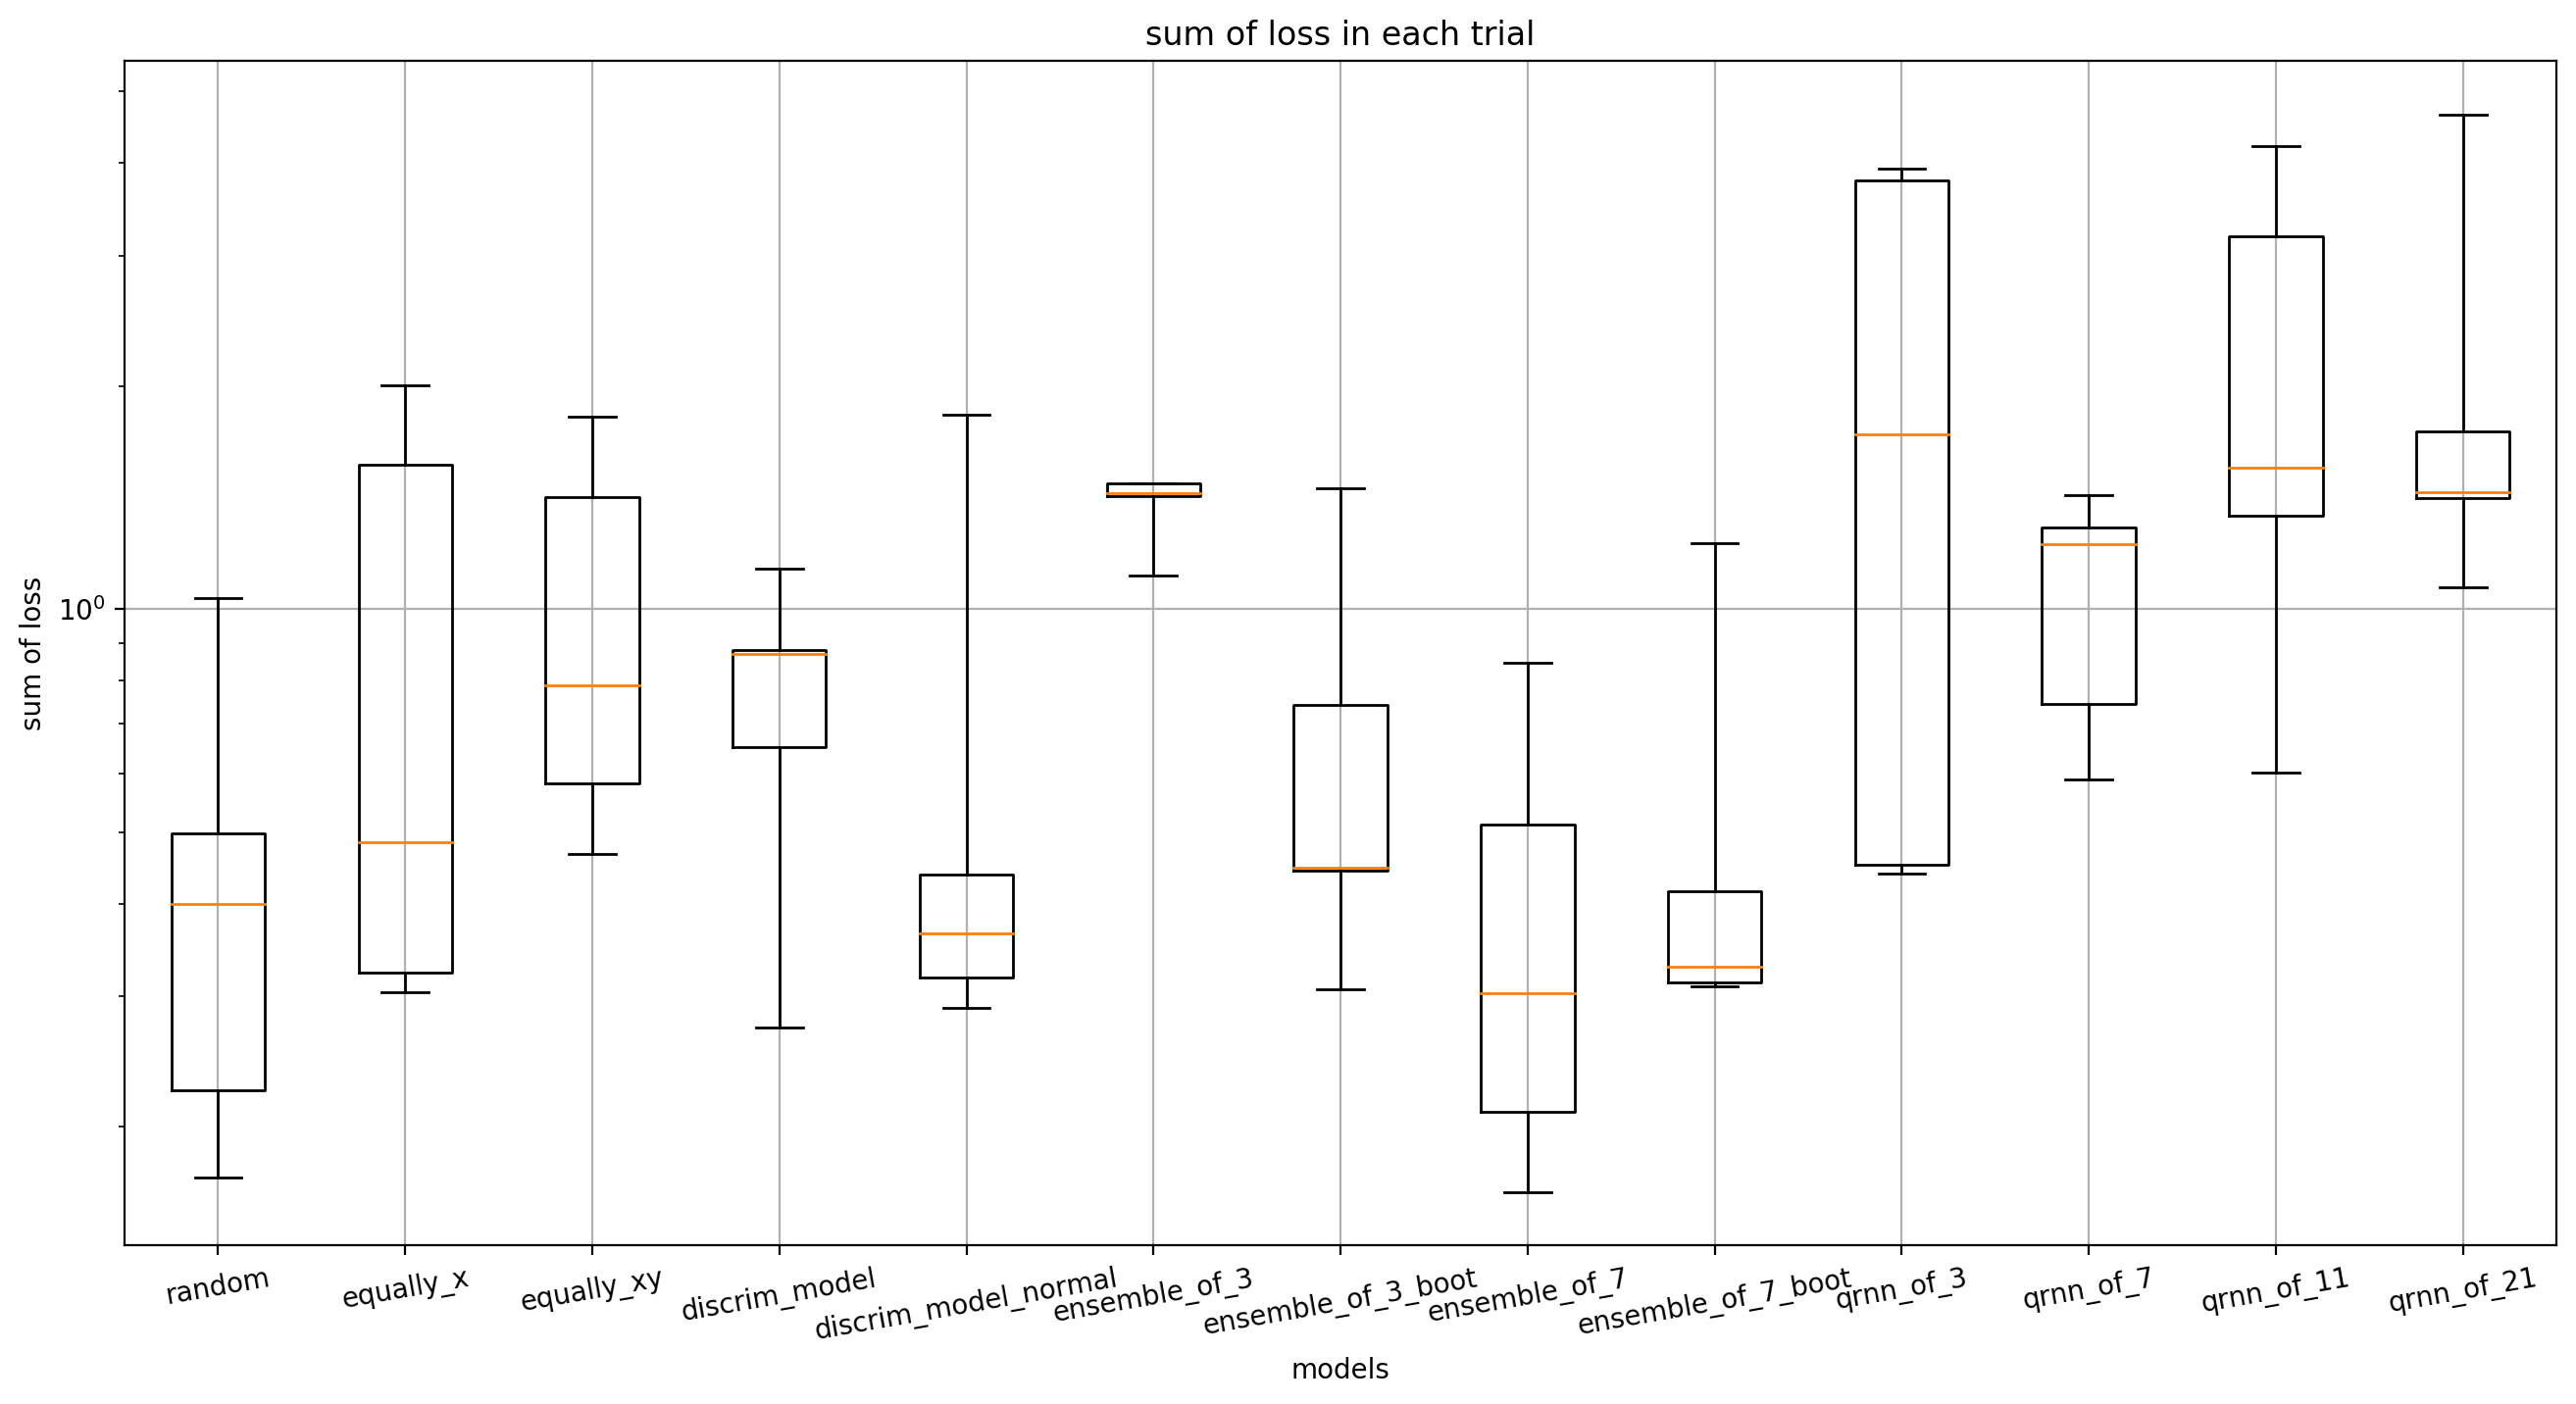

In [117]:
# 数学の点数
# 点数のタプル
points = [eval_dict[k].sum(axis=1) for k in orderd_keys]

# 箱ひげ図
fig, ax = plt.subplots(figsize=(16,8),dpi=200)

bp = ax.boxplot(points,whis=10000)
ax.set_xticklabels(orderd_keys,rotation=10)
plt.yscale('log')

plt.title('sum of loss in each trial')
plt.ylabel('sum of loss')
plt.xlabel('models')
# Y軸のメモリのrange
#plt.ylim(0,0.1)
plt.grid()

# 描画
plt.show()

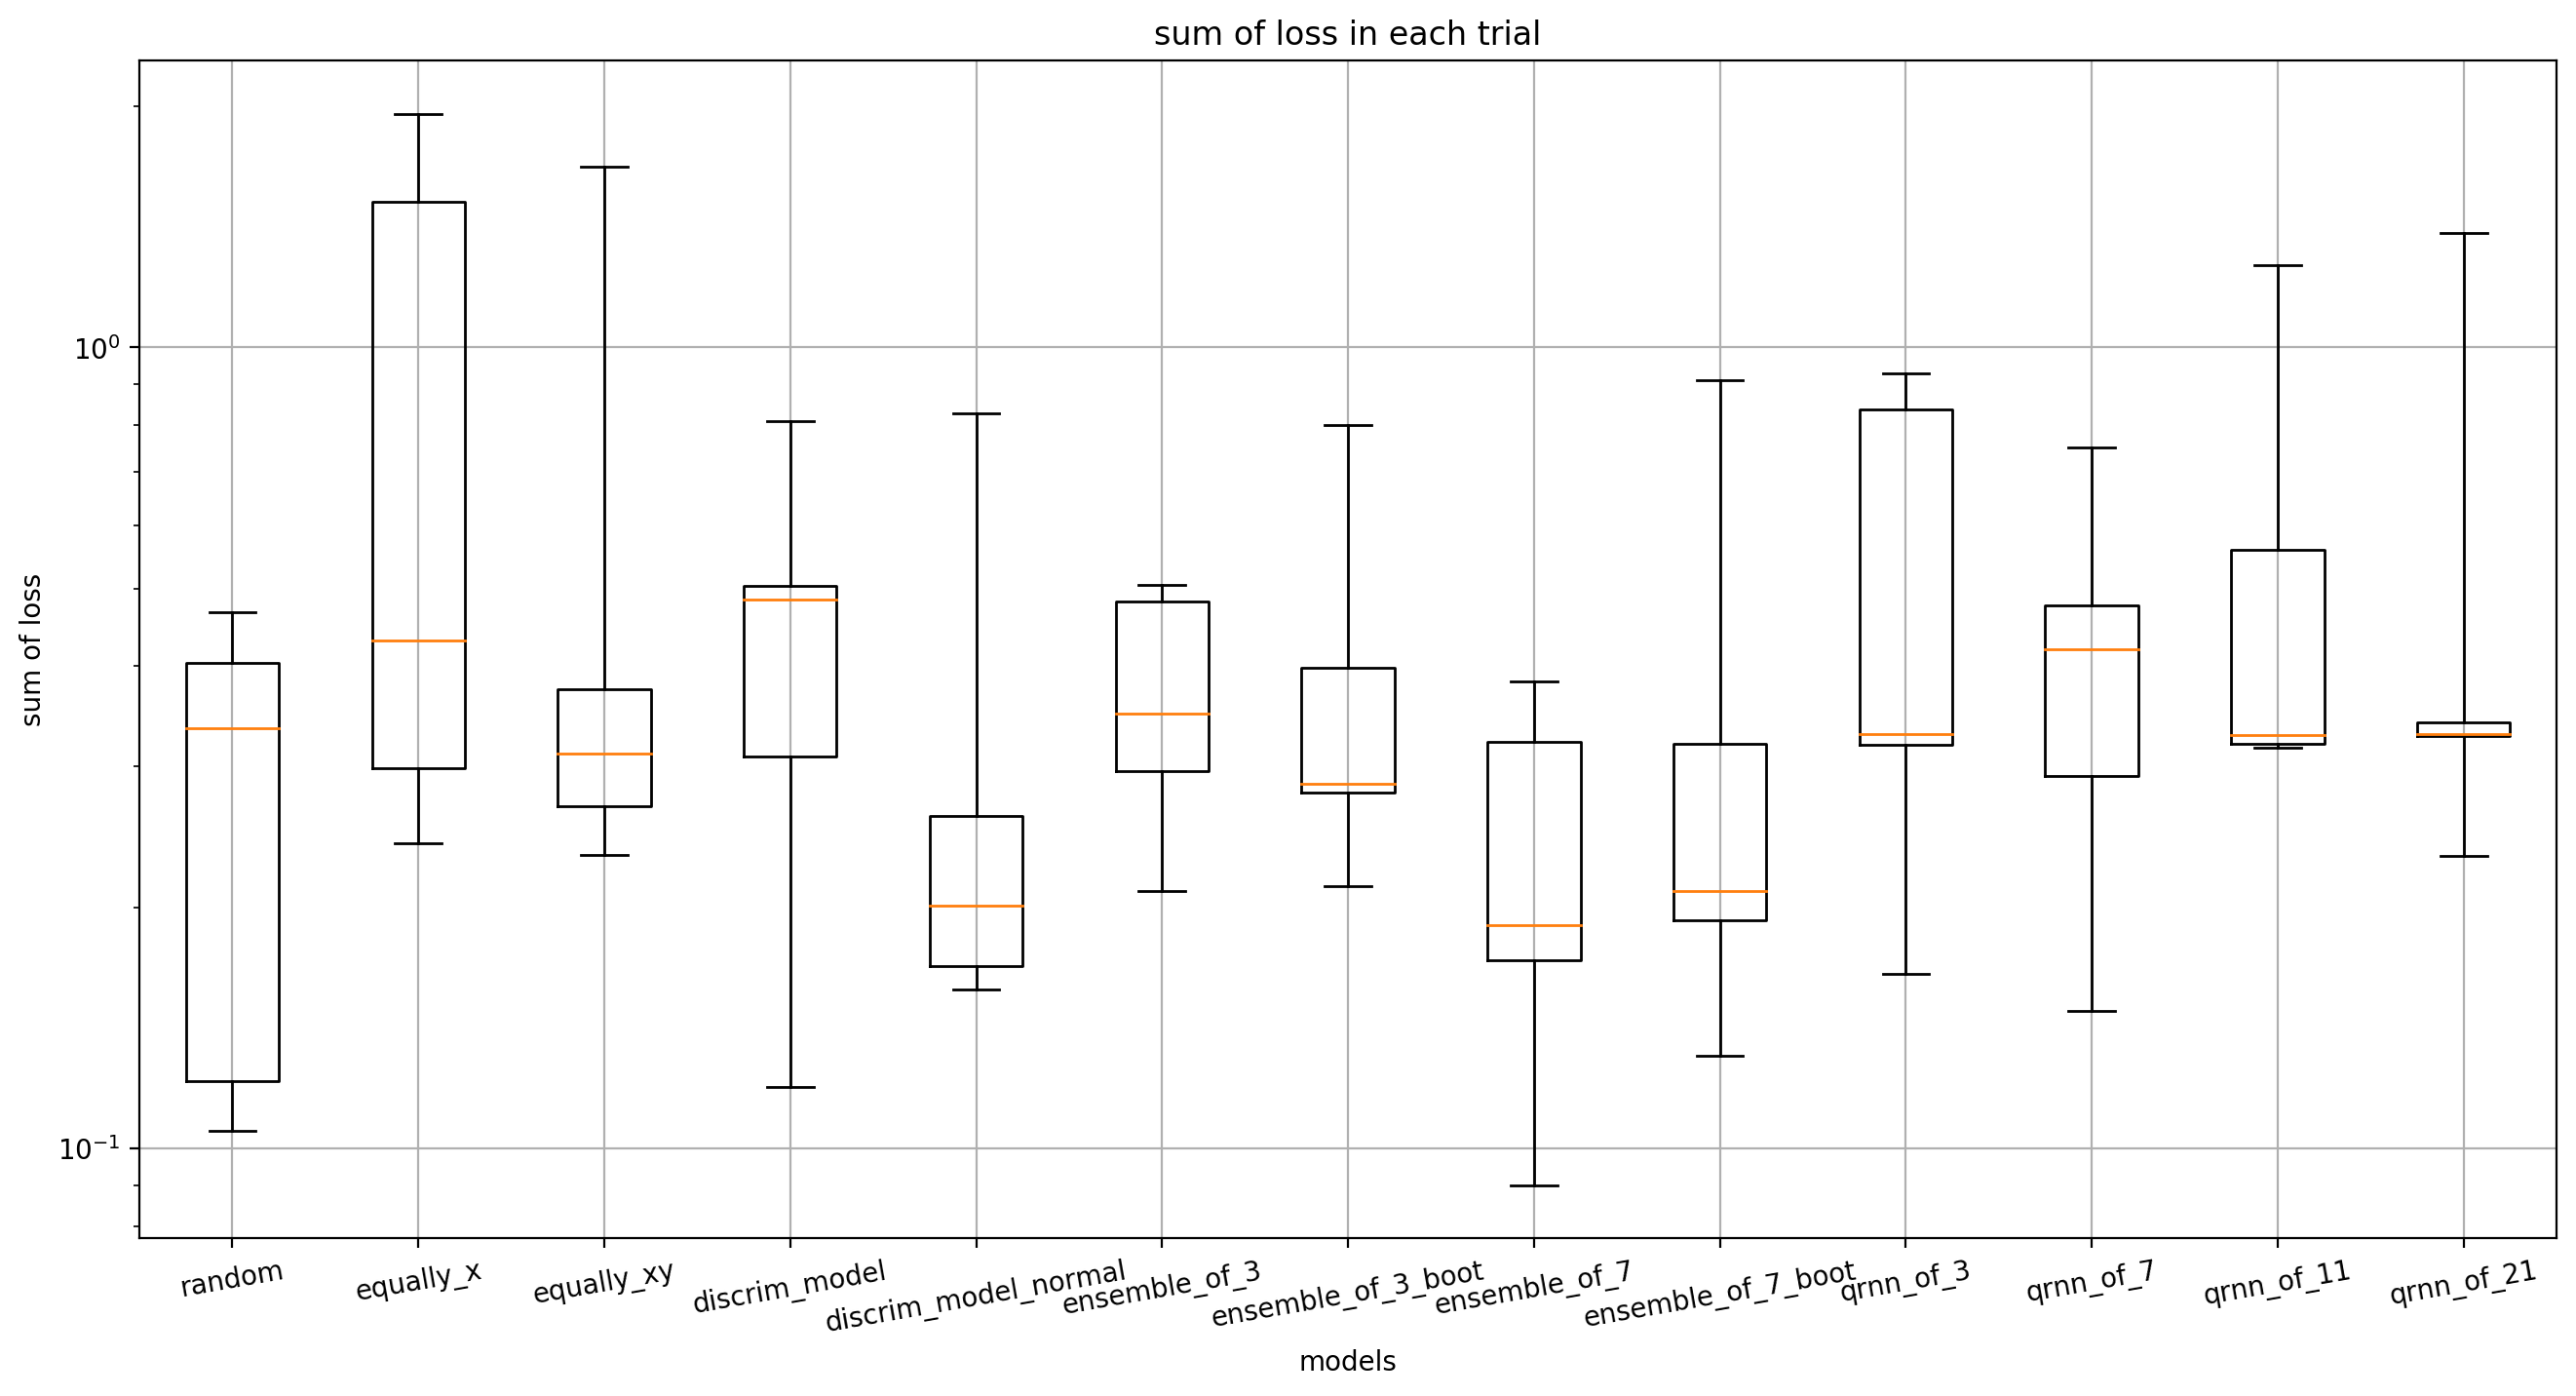

In [131]:
# 数学の点数
# 点数のタプル
points = [eval_dict[k][:,:7].sum(axis=1) for k in orderd_keys]

# 箱ひげ図
fig, ax = plt.subplots(figsize=(16,8),dpi=200)

bp = ax.boxplot(points,whis=10000)
ax.set_xticklabels(orderd_keys,rotation=10)
plt.yscale('log')

plt.title('sum of loss in each trial')
plt.ylabel('sum of loss')
plt.xlabel('models')
# Y軸のメモリのrange
#plt.ylim(0,0.1)
plt.grid()

# 描画
plt.show()

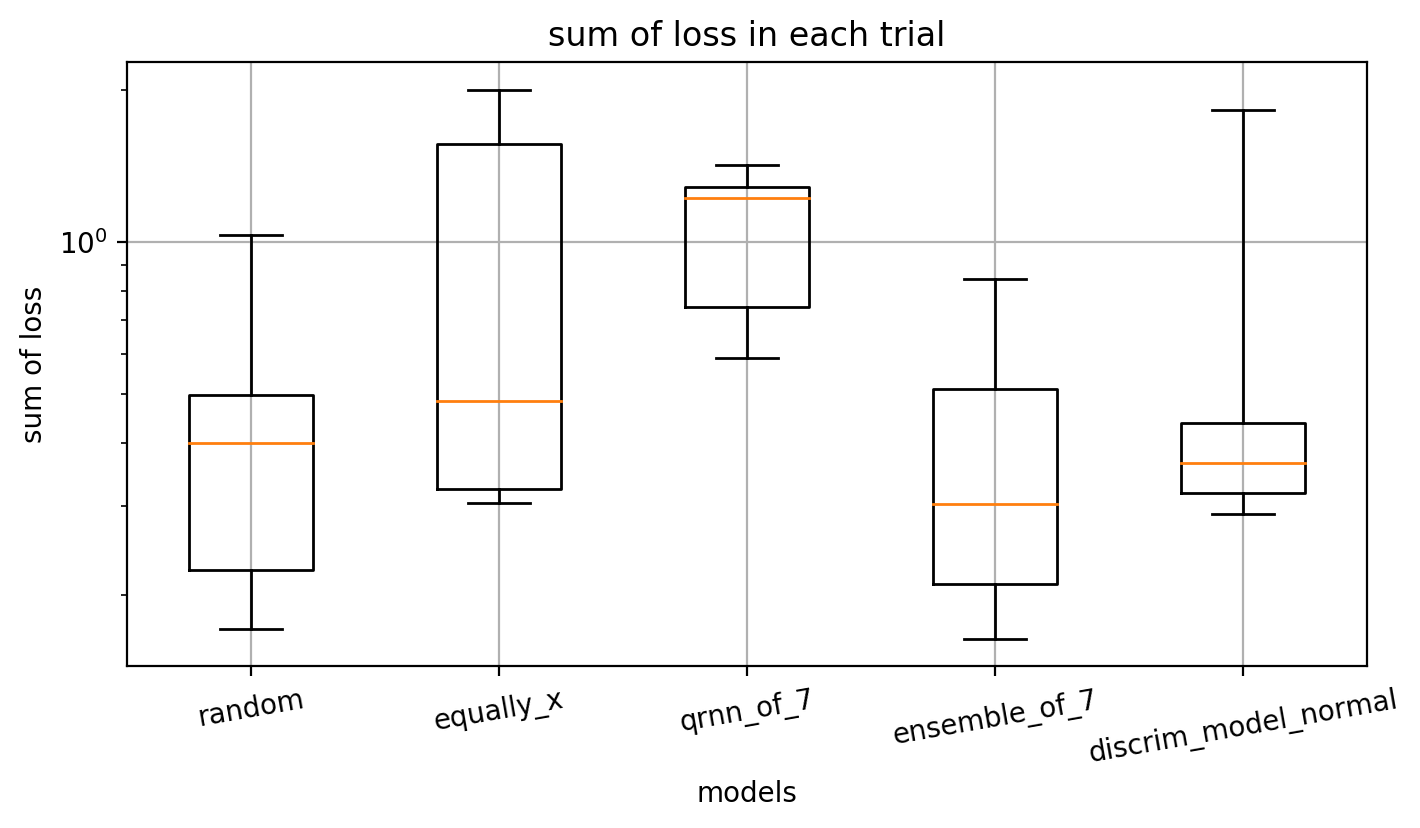

In [168]:
orderd_keys = [
    'random',
    'equally_x',
    'qrnn_of_7',
    'ensemble_of_7',
    'discrim_model_normal',]
# 数学の点数
# 点数のタプル
points = [eval_dict[k].sum(axis=1) for k in orderd_keys]

# 箱ひげ図
fig, ax = plt.subplots(figsize=(8,4),dpi=200)

bp = ax.boxplot(points,whis=10000)
ax.set_xticklabels(orderd_keys,rotation=10)
plt.yscale('log')

plt.title('sum of loss in each trial')
plt.ylabel('sum of loss')
plt.xlabel('models')
# Y軸のメモリのrange
#plt.ylim(0,0.1)
plt.grid()

# 描画
plt.show()

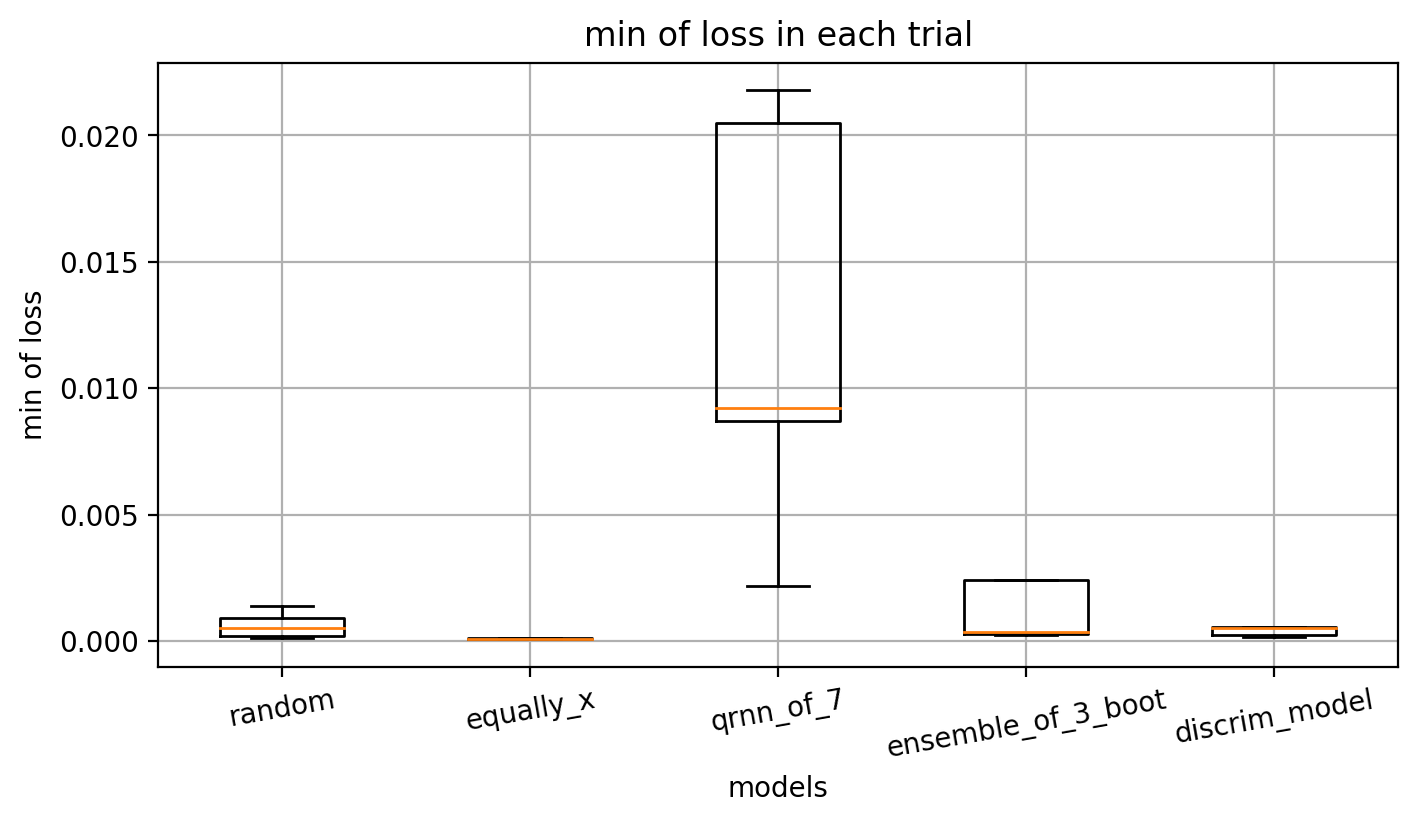

In [171]:
orderd_keys = [
    'random',
    'equally_x',
    'qrnn_of_7',
    'ensemble_of_3_boot',
    'discrim_model',]
# 数学の点数
# 点数のタプル
points = [eval_dict[k].min(axis=1) for k in orderd_keys]

# 箱ひげ図
fig, ax = plt.subplots(figsize=(8,4),dpi=200)

bp = ax.boxplot(points,whis=10000)
ax.set_xticklabels(orderd_keys,rotation=10)
#plt.yscale('log')

plt.title('min of loss in each trial')
plt.ylabel('min of loss')
plt.xlabel('models')
# Y軸のメモリのrange
#plt.ylim(0,0.1)
plt.grid()

# 描画
plt.show()

In [178]:
orderd_keys = [
    'random',
    'equally_x',
   # 'equally_xy',
    'qrnn_of_3',
    'qrnn_of_7',
    'qrnn_of_11',    
    'ensemble_of_3',
    'ensemble_of_3_boot',
    'ensemble_of_7',
    'ensemble_of_7_boot',

    'discrim_model_normal',
    'discrim_model',
    ]
color = ['black',
             'gray',
        'lightcoral',
         'lightcoral',
         'lightcoral',
         'cyan',
          'cyan',
          'cyan',
          'cyan',
         'lightgreen',
         'green'
         ]

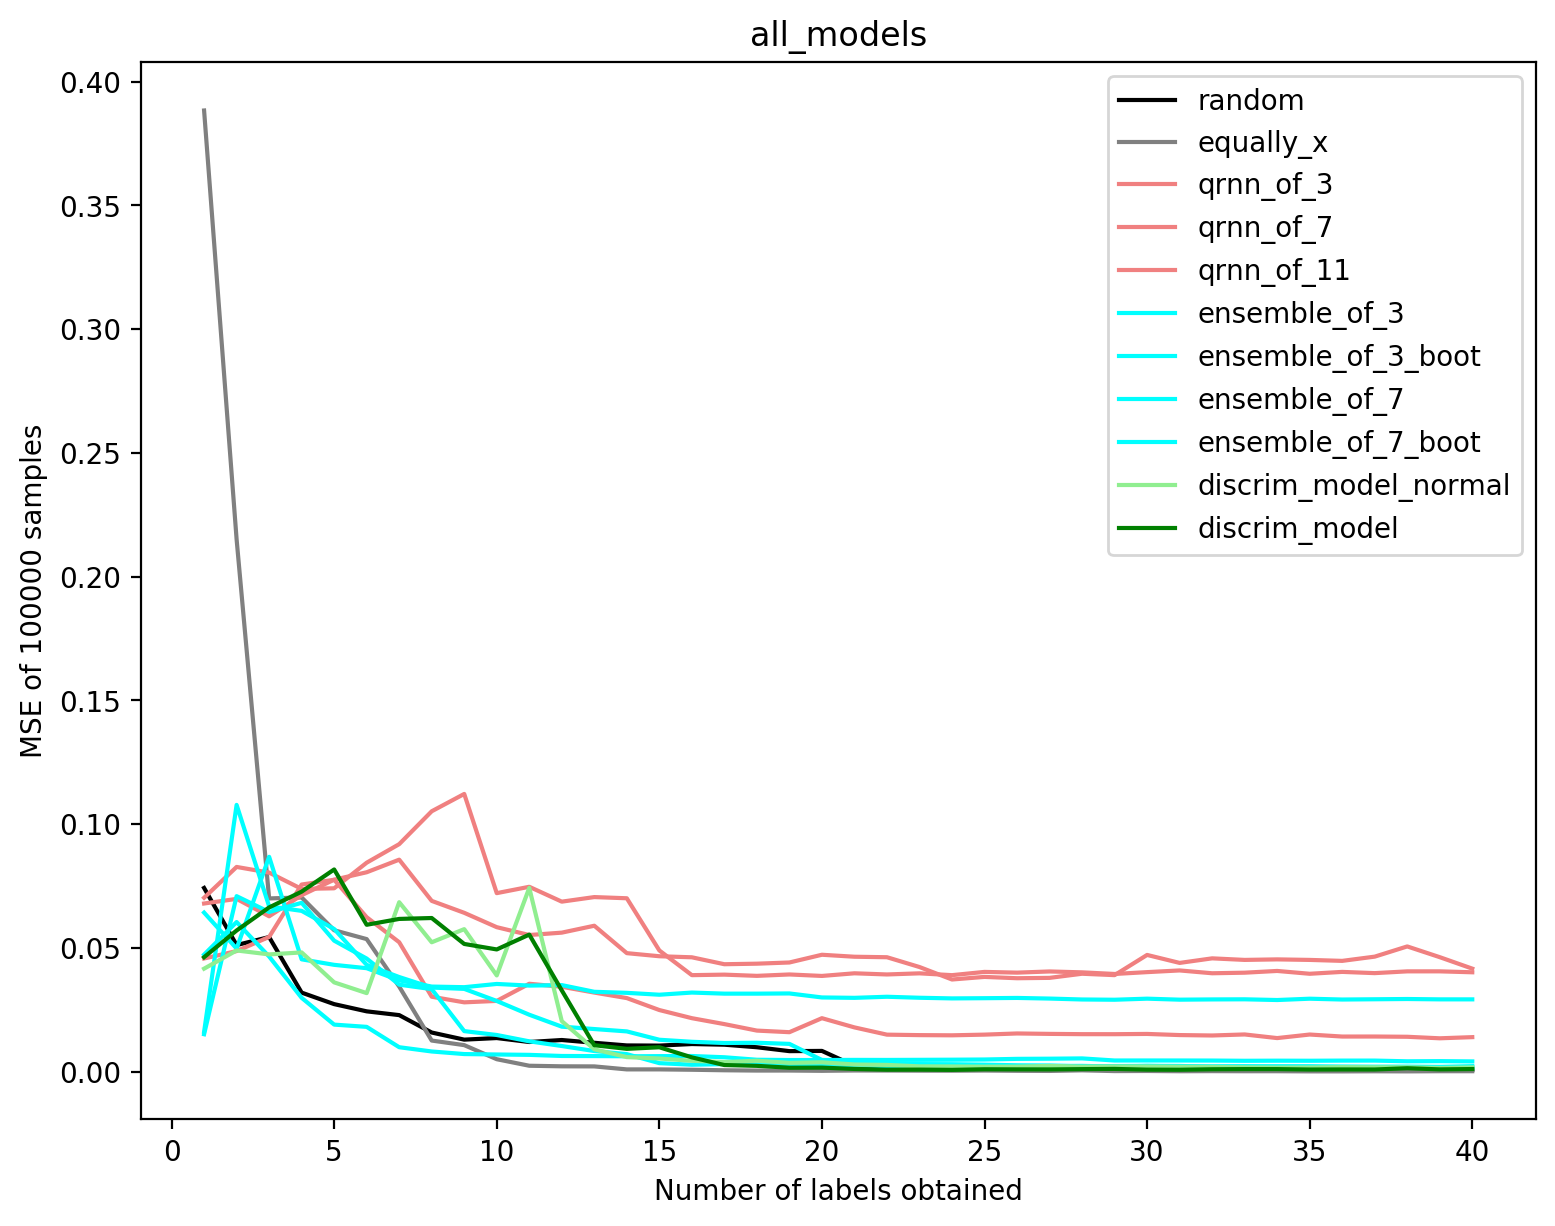

In [185]:
plt.figure(figsize=(9,7),dpi=200)
for c,k in zip(color,orderd_keys):
    plt.plot(range(1,1+len(eval_dict[k].mean(axis=0))),eval_dict[k].mean(axis=0),label=k,c=c)
#plt.ylim(0,0.005)
# plt.yscale('log')
plt.xlabel('Number of labels obtained')
plt.ylabel('MSE of 100000 samples')
plt.title('all_models')
plt.legend()